# Projet de Segmentation Client - inwi

**Objectif** : Segmenter la base clientèle en 8 segments et proposer un plan CVM

**Dataset** : base_seg_gsm.csv (8001 clients)

**Deadline** : 15/02/2026

In [ ]:
!pip install seaborn
# Installation des bibliothèques nécessaires
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Installation des packages
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn']
for package in packages:
    try:
        __import__(package)
        print(f"✅ {package} déjà installé")
    except ImportError:
        print(f"📦 Installation de {package}...")
        install_package(package)

# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")

print("🎉 Toutes les bibliothèques sont prêtes !")




[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ pandas déjà installé
✅ numpy déjà installé
✅ matplotlib déjà installé
✅ seaborn déjà installé
📦 Installation de scikit-learn...
🎉 Toutes les bibliothèques sont prêtes !


In [ ]:
# Chargement des données
df = pd.read_csv('base_seg_gsm.csv')
print(f"📊 Dimensions du dataset : {df.shape[0]} clients, {df.shape[1]} variables")
print(f"📋 Colonnes : {list(df.columns)}")

In [ ]:
# Aperçu des données
print("👀 Aperçu des 5 premières lignes :")
display(df.head())

print("\n📈 Aperçu des 5 dernières lignes :")
display(df.tail())

Dimensions du dataset : (8000, 13)

Noms des colonnes : ['ID', 'MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN', 'POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN', 'SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']


In [ ]:
# Statistiques descriptives détaillées
print("📊 Statistiques descriptives :")
display(df.describe().round(3))

# Analyse des variables catégorielles/binaires
print("\n📱 Analyse des variables binaires :")
binary_vars = ['SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']
for var in binary_vars:
    counts = df[var].value_counts()
    print(f"\n{var}:")
    print(f"  Non (0): {counts.get(0, 0)} clients ({counts.get(0, 0)/len(df)*100:.1f}%)")
    print(f"  Oui (1): {counts.get(1, 0)} clients ({counts.get(1, 0)/len(df)*100:.1f}%)")

# Analyse des variables continues
print(f"\n💰 Analyse des variables monétaires :")
print(f"  Montant moyen par rechargement (MMPR): {df['MMPR'].mean():.2f} ± {df['MMPR'].std():.2f}")
print(f"  Min: {df['MMPR'].min():.2f}, Max: {df['MMPR'].max():.2f}")
print(f"  Fréquence moyenne de rechargement: {df['FREQR'].mean():.2f} ± {df['FREQR'].std():.2f}")

Aperçu des 5 premières lignes :


,ID,MMPR,FREQR,POIDS_VAS,POIDS_IN,POIDS_IN_OFFN,POIDS_OPK,POIDS_ONG,POIDS_INT,POIDS_ONN,SMART_PHONE,MULTI_EQUIPE,USERS_INTERNET
0,6.0,20.0,5.0,0.012244,0.032905,0.800251,0.912323,0.301724,0.571299,0.960274,0.0,0.0,0.0
1,18.0,20.0,1.0,0.000000,0.930400,0.254946,0.642126,0.000000,0.604382,0.694052,0.0,0.0,0.0
2,62.0,10.0,1.0,0.152091,0.623734,0.693735,0.283647,0.000000,0.518100,0.360347,0.0,0.0,0.0
3,109.0,0.0,0.0,0.000000,0.791667,0.848297,0.181373,0.000000,0.879562,0.328431,0.0,0.0,0.0
4,123.0,42.5,4.0,0.035871,0.205944,0.986124,0.117165,0.000000,0.807484,0.613069,1.0,0.0,0.0


In [ ]:
# Vérification des valeurs manquantes et des doublons
print("🔍 Vérification de la qualité des données :")
missing_values = df.isnull().sum()
print(f"\nValeurs manquantes par colonne :")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"  {col}: ✅ 0 valeurs manquantes")

# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"\n🔄 Doublons : {duplicates} ({duplicates/len(df)*100:.1f}%)")

# Vérification des IDs uniques
unique_ids = df['ID'].nunique()
print(f"🆔 IDs uniques : {unique_ids}/{len(df)}")

# Types de données
print(f"\n📋 Types de données :")
print(df.dtypes)

Statistiques descriptives :


,ID,MMPR,FREQR,POIDS_VAS,POIDS_IN,POIDS_IN_OFFN,POIDS_OPK,POIDS_ONG,POIDS_INT,POIDS_ONN,SMART_PHONE,MULTI_EQUIPE,USERS_INTERNET
count,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000
mean,4000.500,14.854,5.218,0.104,0.406,0.202,0.492,0.282,0.048,0.823,0.104,0.114,0.114
std,2309.545,12.584,7.586,0.208,0.377,0.301,0.310,0.391,0.168,0.243,0.306,0.317,0.318
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2000.750,10.000,1.000,0.000,0.024,0.000,0.220,0.000,0.000,0.746,0.000,0.000,0.000
50%,4000.500,13.750,3.000,0.000,0.305,0.032,0.492,0.000,0.000,0.940,0.000,0.000,0.000
75%,6000.250,20.000,6.000,0.100,0.781,0.294,0.760,0.638,0.000,0.989,0.000,0.000,0.000
max,8000.000,250.000,116.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
# Visualisation des distributions des variables clés
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Distribution des Variables Clés', fontsize=16, fontweight='bold')

# Variables continues principales
variables_continues = ['MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN']
for i, var in enumerate(variables_continues):
    row, col = i // 3, i % 3
    sns.histplot(df[var], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {var}')
    axes[row, col].set_xlabel('')
    axes[row, col].grid(True, alpha=0.3)

# Variables de poids d'appels
variables_poids = ['POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN']
for i, var in enumerate(variables_poids):
    row, col = (i + 5) // 3, (i + 5) % 3
    if row < 3 and col < 3:
        sns.histplot(df[var], bins=30, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution de {var}')
        axes[row, col].set_xlabel('')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution des variables binaires
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('📱 Variables Binaires', fontsize=14, fontweight='bold')

binary_vars = ['SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']
for i, var in enumerate(binary_vars):
    counts = df[var].value_counts()
    labels = ['Non', 'Oui']
    colors = ['#ff9999', '#66b3ff']
    axes[i].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'{var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

Valeurs manquantes par colonne :


ID                0
MMPR              0
FREQR             0
POIDS_VAS         0
POIDS_IN          0
POIDS_IN_OFFN     0
POIDS_OPK         0
POIDS_ONG         0
POIDS_INT         0
POIDS_ONN         0
SMART_PHONE       0
MULTI_EQUIPE      0
USERS_INTERNET    0
dtype: int64

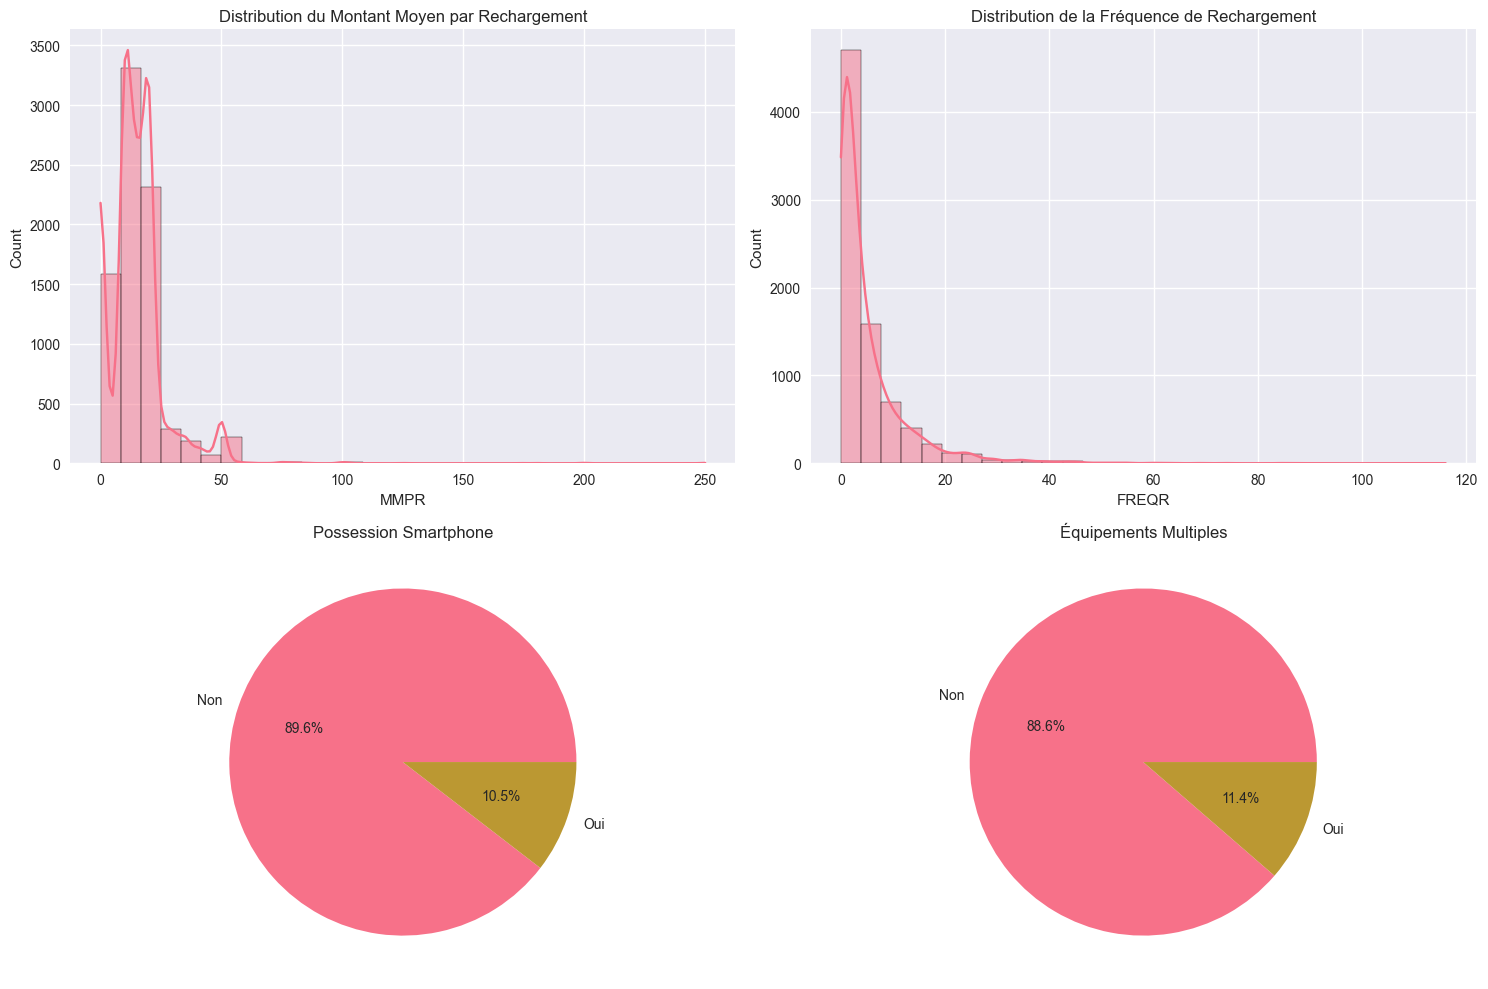

In [ ]:
# Analyse des corrélations
plt.figure(figsize=(14, 10))
correlation_matrix = df.drop('ID', axis=1).corr()

# Création d'un masque pour le triangle supérieur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap des corrélations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8},
            annot_kws={'size': 8})
plt.title('🔗 Matrice de Corrélation des Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identification des corrélations fortes (> 0.5 ou < -0.5)
print("🔗 Corrélations fortes (|r| > 0.5) :")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))
            print(f"  {var1} ↔ {var2}: {corr_value:.3f}")

if not strong_correlations:
    print("  Aucune corrélation forte détectée")

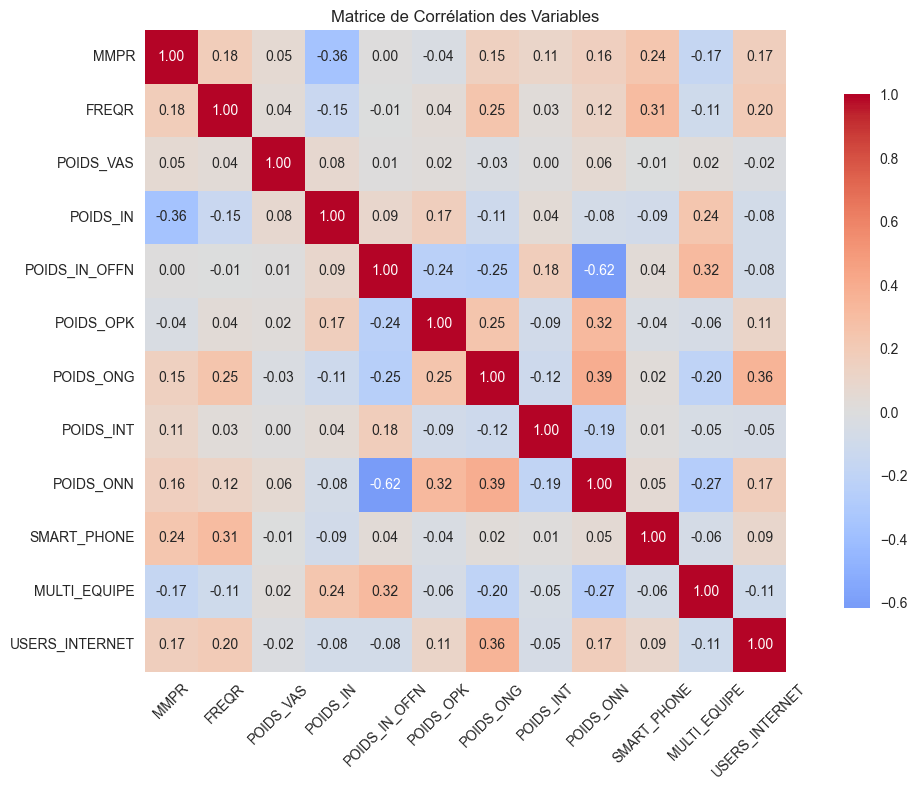

In [ ]:
# Analyse des outliers et valeurs extrêmes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Analyse des Outliers - Boxplots', fontsize=16, fontweight='bold')

# Boxplots pour les variables principales
key_vars = ['MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN']
for i, var in enumerate(key_vars):
    row, col = i // 2, i % 2
    sns.boxplot(y=df[var], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Boxplot de {var}')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcul des statistiques d'outliers
print("📊 Analyse des outliers (méthode IQR) :")
for var in key_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"\n{var}:")
    print(f"  Limites: [{lower_bound:.3f}, {upper_bound:.3f}]")
    print(f"  Outliers: {len(outliers)} clients ({len(outliers)/len(df)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Valeur min outlier: {outliers[var].min():.3f}")
        print(f"  Valeur max outlier: {outliers[var].max():.3f}")

Valeurs manquantes par colonne :


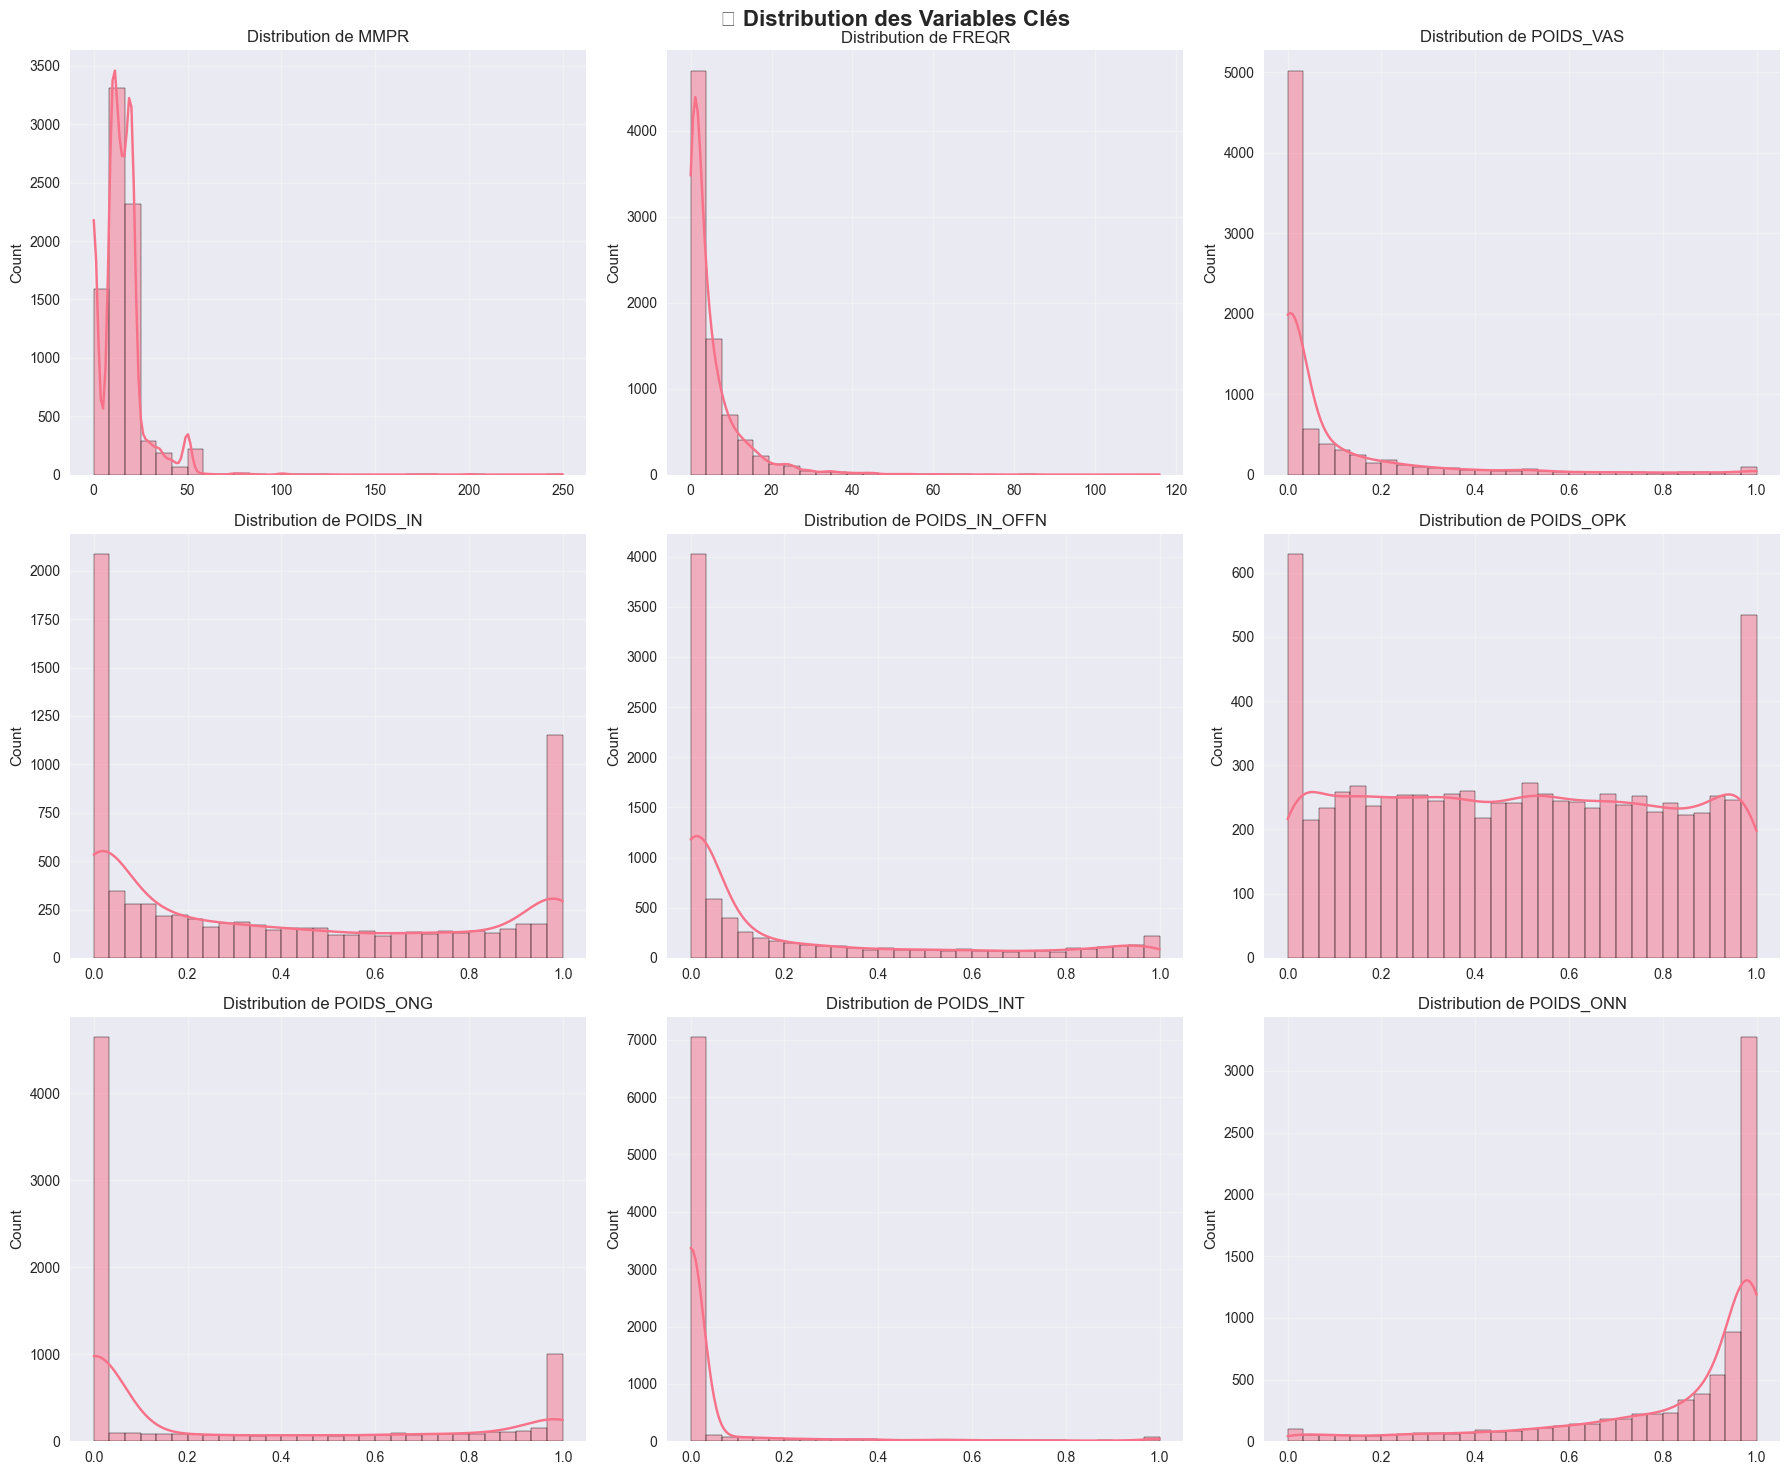

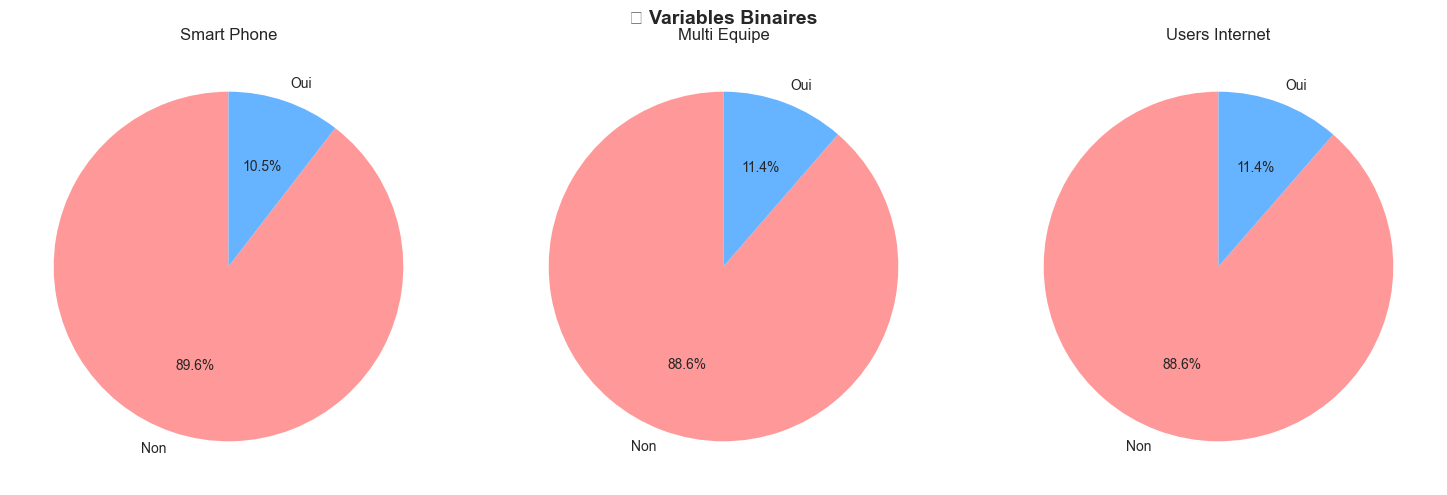

In [ ]:
print("Valeurs manquantes par colonne :")
df.isnull().sum()
# Visualisation des distributions des variables clés
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Distribution des Variables Clés', fontsize=16, fontweight='bold')

# Variables continues principales
variables_continues = ['MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN']
for i, var in enumerate(variables_continues):
    row, col = i // 3, i % 3
    sns.histplot(df[var], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {var}')
    axes[row, col].set_xlabel('')
    axes[row, col].grid(True, alpha=0.3)

# Variables de poids d'appels
variables_poids = ['POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN']
for i, var in enumerate(variables_poids):
    row, col = (i + 5) // 3, (i + 5) % 3
    if row < 3 and col < 3:
        sns.histplot(df[var], bins=30, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution de {var}')
        axes[row, col].set_xlabel('')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution des variables binaires
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('📱 Variables Binaires', fontsize=14, fontweight='bold')

binary_vars = ['SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']
for i, var in enumerate(binary_vars):
    counts = df[var].value_counts()
    labels = ['Non', 'Oui']
    colors = ['#ff9999', '#66b3ff']
    axes[i].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'{var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Préparer les données pour la segmentation (normalisation, nettoyage)

🚀 DÉBUT DE LA PRÉPARATION DES DONNÉES
🔄 Chargement des données...
✅ Données chargées : 8000 clients, 13 variables
📋 Colonnes : ['ID', 'MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN', 'POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN', 'SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']

👀 Aperçu des données :
      ID  MMPR  FREQR  POIDS_VAS  POIDS_IN  POIDS_IN_OFFN  POIDS_OPK  \
0    6.0  20.0    5.0   0.012244  0.032905       0.800251   0.912323   
1   18.0  20.0    1.0   0.000000  0.930400       0.254946   0.642126   
2   62.0  10.0    1.0   0.152091  0.623734       0.693735   0.283647   
3  109.0   0.0    0.0   0.000000  0.791667       0.848297   0.181373   
4  123.0  42.5    4.0   0.035871  0.205944       0.986124   0.117165   

   POIDS_ONG  POIDS_INT  POIDS_ONN  SMART_PHONE  MULTI_EQUIPE  USERS_INTERNET  
0   0.301724   0.571299   0.960274          0.0           0.0             0.0  
1   0.000000   0.604382   0.694052          0.0           0.0             0.0  
2   0.000

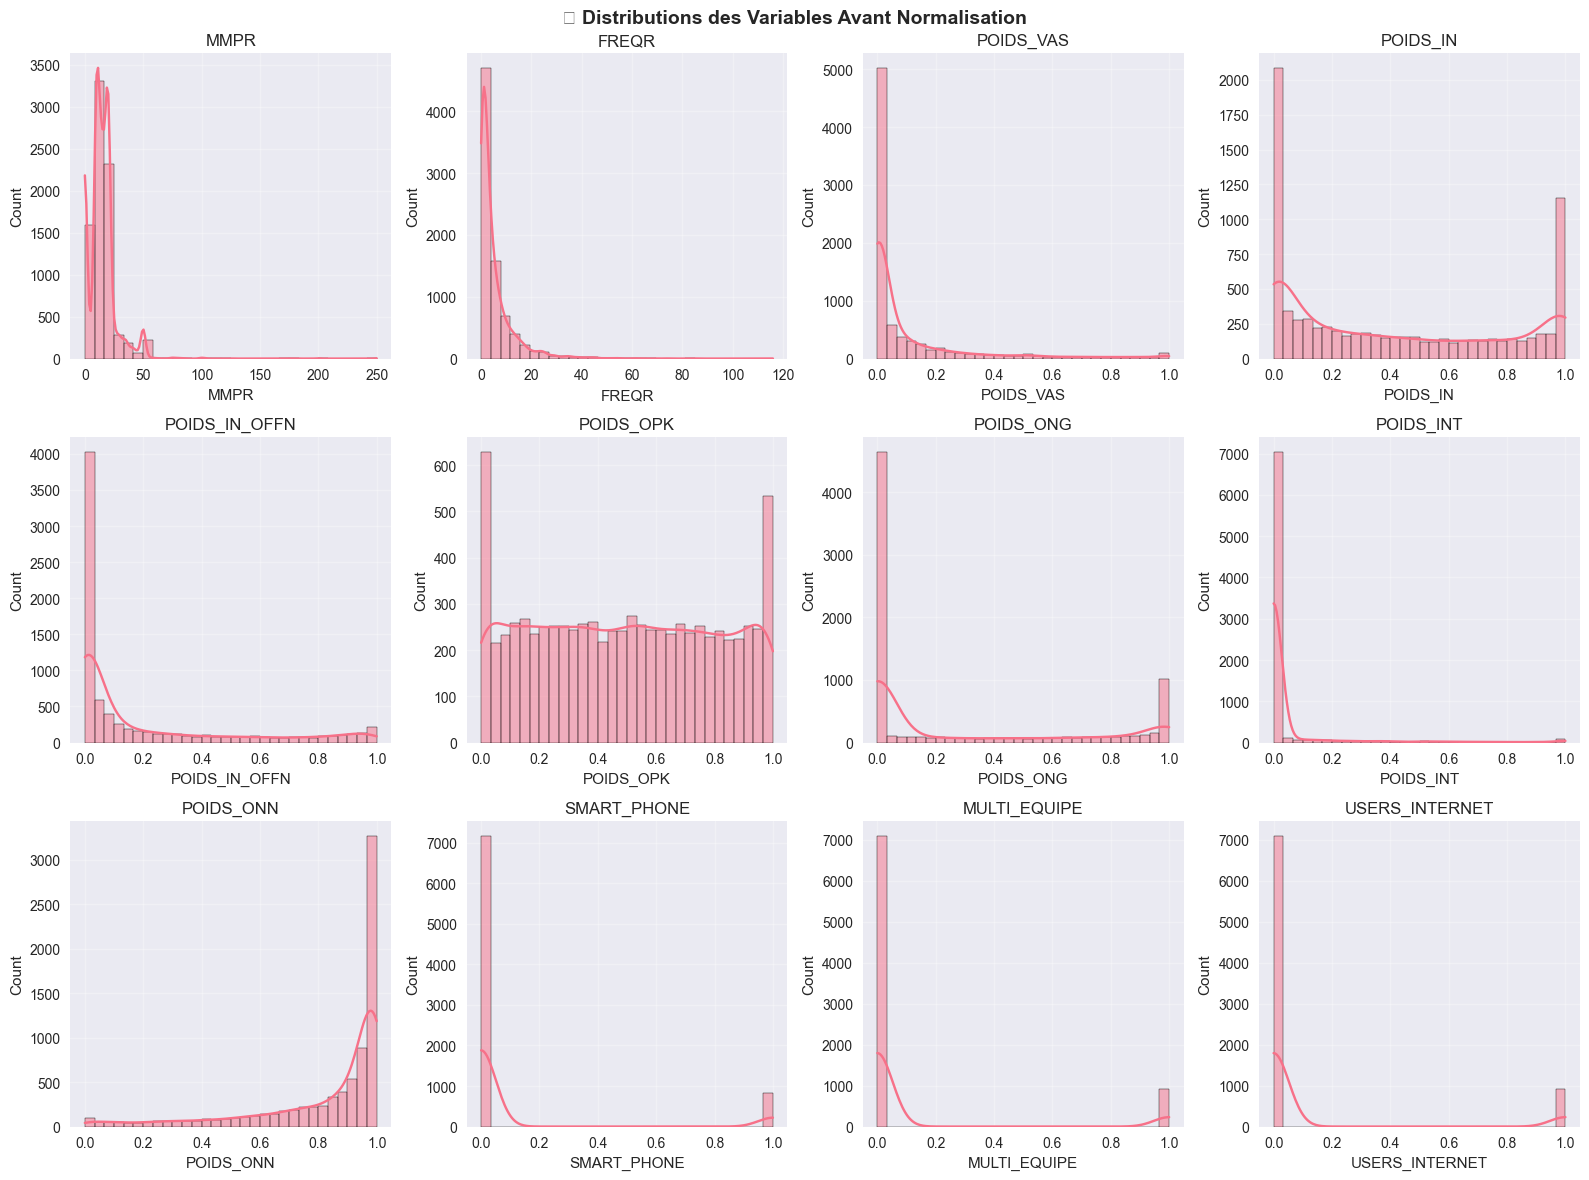


🔍 Détection des outliers...
⚠️ MMPR: 415 outliers (5.2%)
⚠️ FREQR: 795 outliers (9.9%)
⚠️ POIDS_VAS: 1091 outliers (13.6%)
⚠️ POIDS_IN_OFFN: 894 outliers (11.2%)
⚠️ POIDS_INT: 1180 outliers (14.8%)
⚠️ POIDS_ONN: 667 outliers (8.3%)
⚠️ SMART_PHONE: 836 outliers (10.4%)
⚠️ MULTI_EQUIPE: 909 outliers (11.4%)
⚠️ USERS_INTERNET: 911 outliers (11.4%)


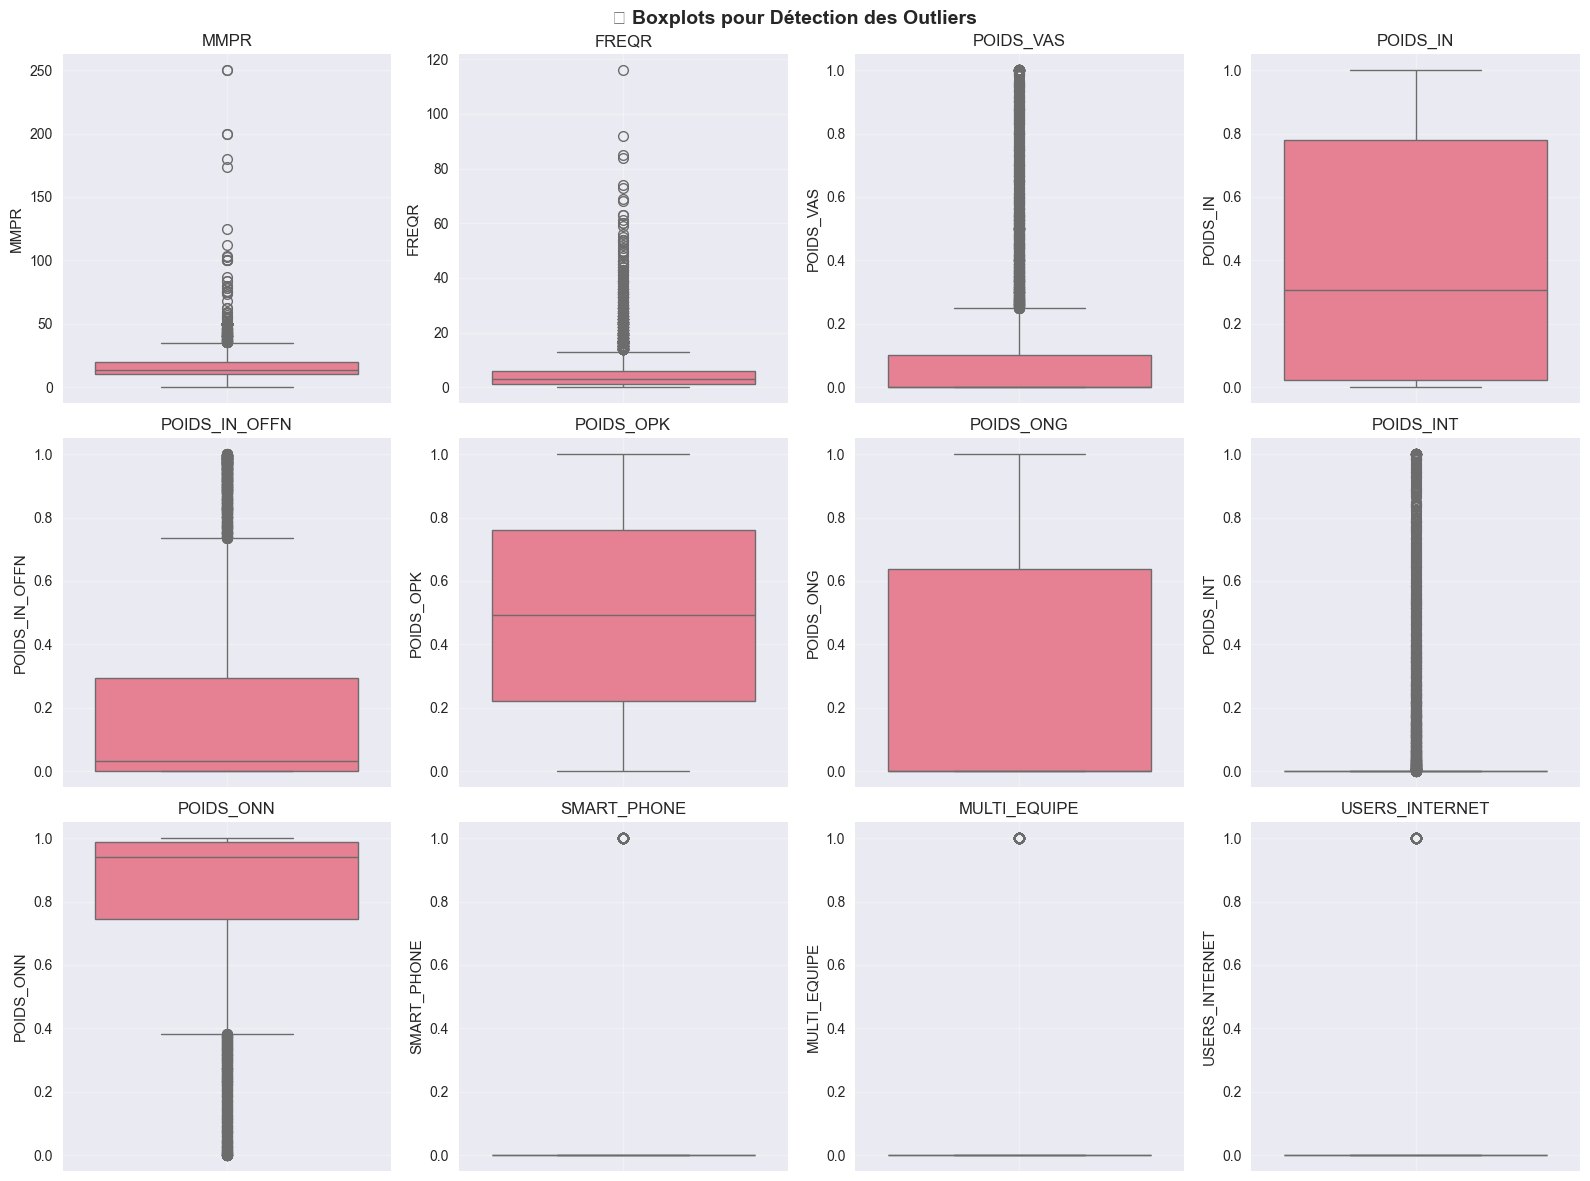


🔧 Normalisation des données...
Types de données avant normalisation :
MMPR              float64
FREQR             float64
POIDS_VAS         float64
POIDS_IN          float64
POIDS_IN_OFFN     float64
POIDS_OPK         float64
POIDS_ONG         float64
POIDS_INT         float64
POIDS_ONN         float64
SMART_PHONE       float64
MULTI_EQUIPE      float64
USERS_INTERNET    float64
dtype: object
✅ Données normalisées : (8000, 12)

Statistiques après normalisation :
           MMPR     FREQR  POIDS_VAS  POIDS_IN  POIDS_IN_OFFN  POIDS_OPK  \
count  8000.000  8000.000   8000.000  8000.000       8000.000   8000.000   
mean     -0.000    -0.000      0.000     0.000         -0.000      0.000   
std       1.000     1.000      1.000     1.000          1.000      1.000   
min      -1.180    -0.688     -0.502    -1.075         -0.668     -1.586   
25%      -0.386    -0.556     -0.502    -1.011         -0.667     -0.877   
50%      -0.088    -0.292     -0.502    -0.266         -0.561     -0.000   


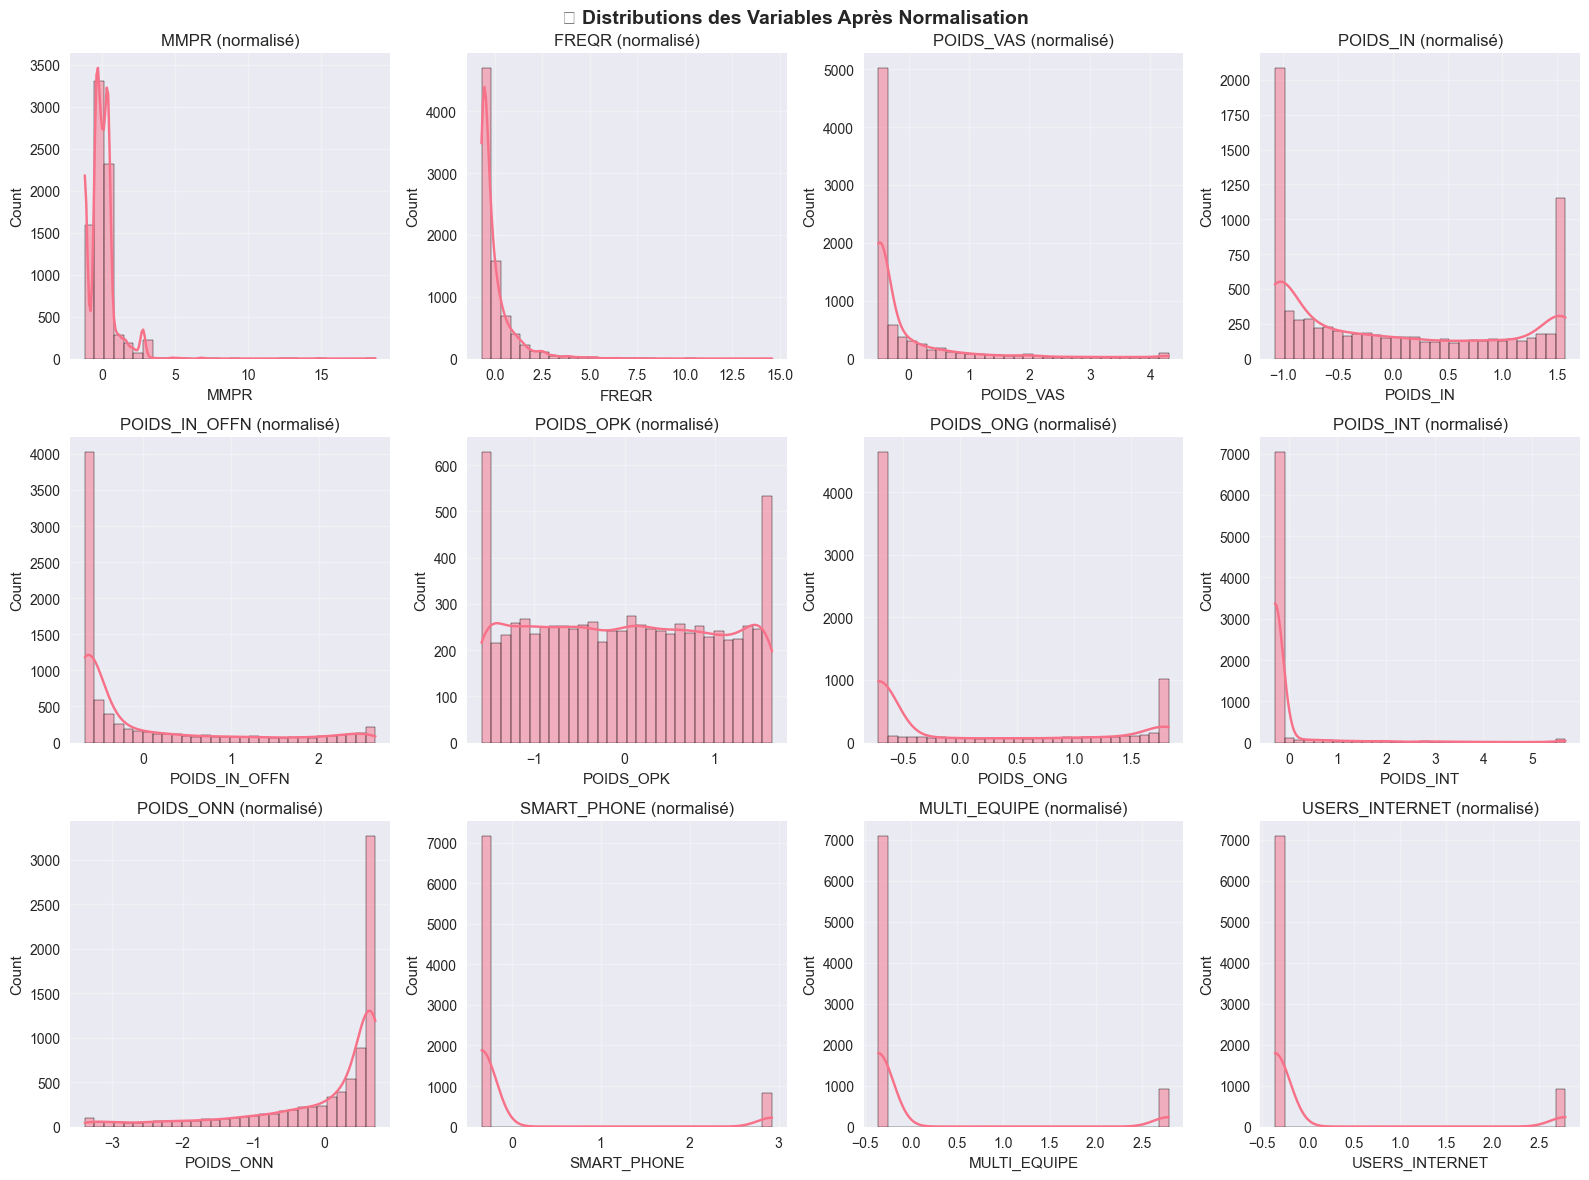


📈 Analyse en Composantes Principales (ACP)...
Variance expliquée par composante :
  PC1: 0.213 (0.213 cumulé)
  PC2: 0.143 (0.356 cumulé)
  PC3: 0.101 (0.457 cumulé)
  PC4: 0.088 (0.545 cumulé)
  PC5: 0.083 (0.628 cumulé)
  PC6: 0.078 (0.706 cumulé)
  PC7: 0.065 (0.771 cumulé)
  PC8: 0.059 (0.830 cumulé)
  PC9: 0.054 (0.884 cumulé)
  PC10: 0.047 (0.931 cumulé)
  PC11: 0.042 (0.972 cumulé)
  PC12: 0.028 (1.000 cumulé)


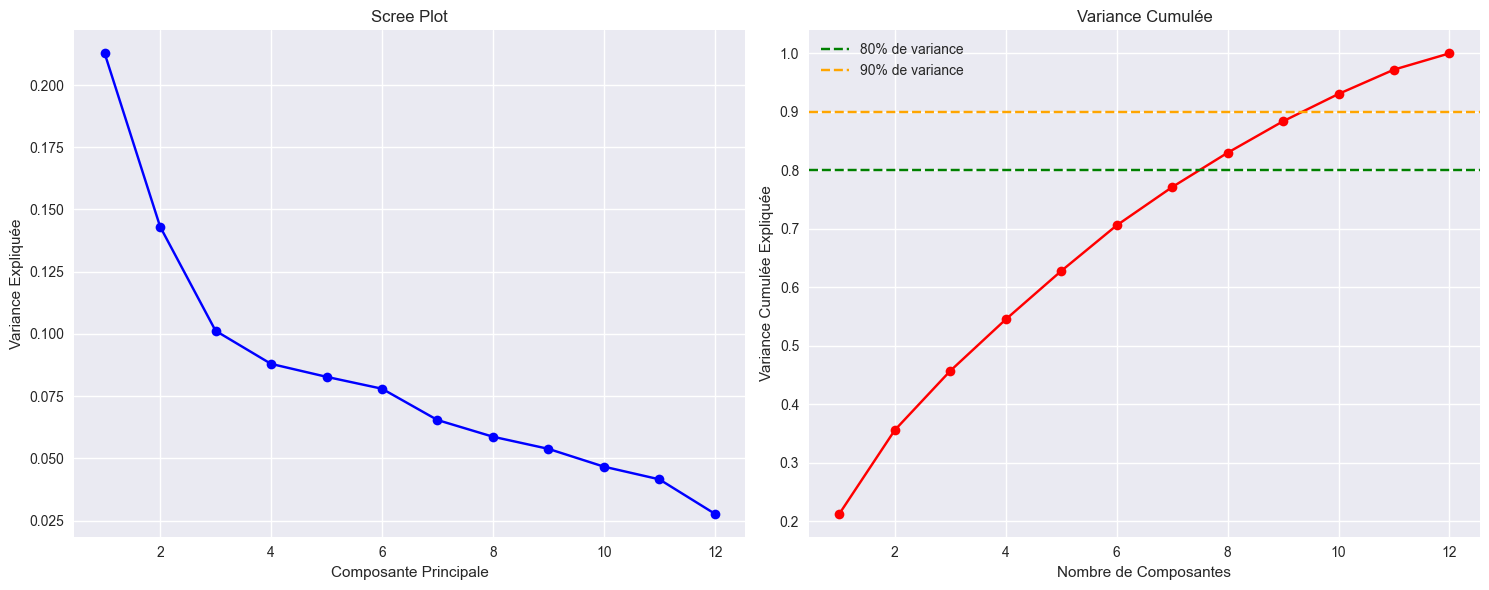

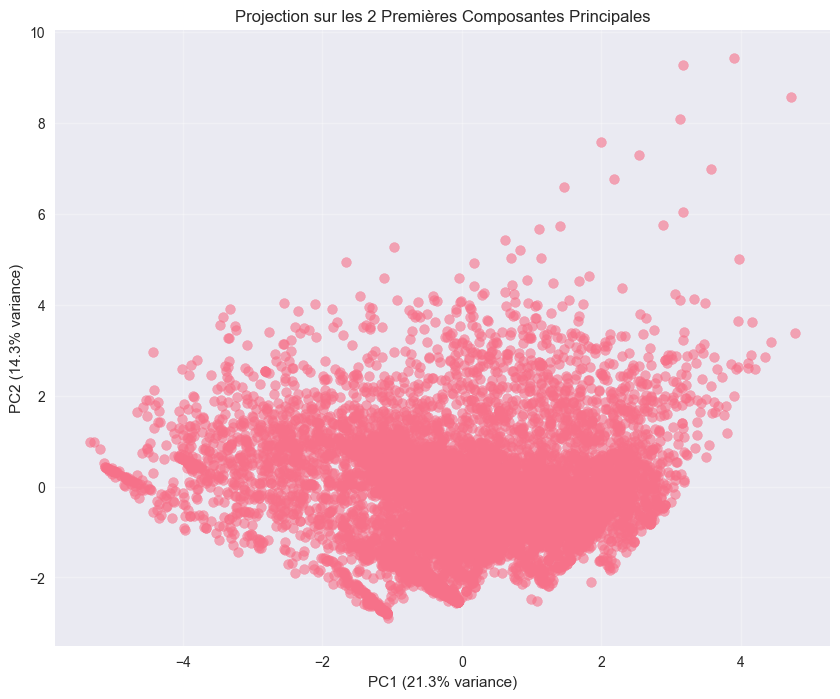


💾 Sauvegarde des données préparées...
✅ Fichier 'data_cleaned.csv' sauvegardé
✅ Fichier 'data_scaled.csv' sauvegardé
✅ Scaler sauvegardé dans 'scaler.pkl'

🎉 PRÉPARATION TERMINÉE AVEC SUCCÈS !
📁 Fichiers générés :
  - data_cleaned.csv (données nettoyées)
  - data_scaled.csv (données normalisées)
  - scaler.pkl (objet de normalisation)

🎯 Les données sont prêtes pour la segmentation !
📊 Dimensions finales : (8000, 12)


In [ ]:
# =============================================================================
# PRÉPARATION DES DONNÉES POUR LA SEGMENTATION
# Projet Customer Value Management - inwi
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

class DataPreparation:
    def __init__(self, data_path):
        """Initialisation de la classe de préparation des données"""
        self.data_path = data_path
        self.df_original = None
        self.df_clean = None
        self.df_scaled = None
        self.scaler = StandardScaler()
        self.features_to_use = None

    def load_and_inspect_data(self):
        """Chargement et inspection initiale des données"""
        print("🔄 Chargement des données...")
        self.df_original = pd.read_csv(self.data_path)

        print(f"✅ Données chargées : {self.df_original.shape[0]} clients, {self.df_original.shape[1]} variables")
        print(f"📋 Colonnes : {list(self.df_original.columns)}")

        # Aperçu
        print("\n👀 Aperçu des données :")
        print(self.df_original.head())

        # Vérification des valeurs manquantes
        missing_values = self.df_original.isnull().sum()
        if missing_values.sum() > 0:
            print(f"\n⚠️ Valeurs manquantes détectées :")
            print(missing_values[missing_values > 0])
        else:
            print(f"\n✅ Aucune valeur manquante")

        return self.df_original

    def clean_data(self):
        """Nettoyage des données"""
        print("\n🧹 Nettoyage des données...")

        # Copie du dataframe original
        self.df_clean = self.df_original.copy()

        # Vérification des doublons
        duplicates = self.df_clean.duplicated().sum()
        if duplicates > 0:
            print(f"🔄 Suppression de {duplicates} doublons...")
            self.df_clean = self.df_clean.drop_duplicates()

        # Vérification des IDs uniques
        unique_ids = self.df_clean['ID'].nunique()
        total_rows = len(self.df_clean)
        if unique_ids != total_rows:
            print(f"⚠️ {total_rows - unique_ids} IDs en double détectés")
            self.df_clean = self.df_clean.drop_duplicates(subset=['ID'], keep='first')

        print(f"✅ Données nettoyées : {self.df_clean.shape[0]} clients restants")
        return self.df_clean

    def select_features(self):
        """Sélection des variables pour la segmentation"""
        print("\n🎯 Sélection des variables pour la segmentation...")

        # Variables à exclure
        exclude_vars = ['ID']  # ID n'est pas une variable de segmentation

        # Variables à inclure
        self.features_to_use = [col for col in self.df_clean.columns if col not in exclude_vars]

        print(f"📊 Variables sélectionnées ({len(self.features_to_use)}) :")
        for i, feature in enumerate(self.features_to_use, 1):
            print(f"  {i}. {feature}")

        # Création du dataframe de features
        df_features = self.df_clean[self.features_to_use].copy()

        return df_features

    def analyze_feature_distributions(self, df_features):
        """Analyse des distributions avant normalisation"""
        print("\n📊 Analyse des distributions avant normalisation...")

        # Statistiques descriptives
        print("Statistiques descriptives :")
        print(df_features.describe().round(3))

        # Visualisation des distributions
        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        fig.suptitle('📊 Distributions des Variables Avant Normalisation', fontsize=14, fontweight='bold')

        for i, col in enumerate(df_features.columns):
            row, col_idx = i // 4, i % 4
            if row < 3:
                sns.histplot(df_features[col], bins=30, kde=True, ax=axes[row, col_idx])
                axes[row, col_idx].set_title(f'{col}')
                axes[row, col_idx].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return df_features

    def normalize_data(self, df_features):
        """Normalisation des données"""
        print("\n🔧 Normalisation des données...")

        # Vérification des types de données
        print("Types de données avant normalisation :")
        print(df_features.dtypes)

        # Standardisation des données
        self.df_scaled = pd.DataFrame(
            self.scaler.fit_transform(df_features),
            columns=df_features.columns,
            index=df_features.index
        )

        print(f"✅ Données normalisées : {self.df_scaled.shape}")

        # Statistiques après normalisation
        print("\nStatistiques après normalisation :")
        print(self.df_scaled.describe().round(3))

        # Visualisation après normalisation
        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        fig.suptitle('📊 Distributions des Variables Après Normalisation', fontsize=14, fontweight='bold')

        for i, col in enumerate(self.df_scaled.columns):
            row, col_idx = i // 4, i % 4
            if row < 3:
                sns.histplot(self.df_scaled[col], bins=30, kde=True, ax=axes[row, col_idx])
                axes[row, col_idx].set_title(f'{col} (normalisé)')
                axes[row, col_idx].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return self.df_scaled

    def detect_outliers(self, df_features):
        """Détection et traitement des outliers"""
        print("\n🔍 Détection des outliers...")

        outlier_info = {}

        for col in df_features.columns:
            Q1 = df_features[col].quantile(0.25)
            Q3 = df_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df_features[(df_features[col] < lower_bound) | (df_features[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(df_features)) * 100

            outlier_info[col] = {
                'count': outlier_count,
                'percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

            if outlier_percentage > 5:  # Si plus de 5% d'outliers
                print(f"⚠️ {col}: {outlier_count} outliers ({outlier_percentage:.1f}%)")

        # Visualisation des outliers
        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        fig.suptitle('📊 Boxplots pour Détection des Outliers', fontsize=14, fontweight='bold')

        for i, col in enumerate(df_features.columns):
            row, col_idx = i // 4, i % 4
            if row < 3:
                sns.boxplot(y=df_features[col], ax=axes[row, col_idx])
                axes[row, col_idx].set_title(f'{col}')
                axes[row, col_idx].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return outlier_info

    def apply_pca_analysis(self, df_scaled):
        """Analyse en composantes principales"""
        print("\n📈 Analyse en Composantes Principales (ACP)...")

        # Application du PCA
        pca = PCA()
        pca_result = pca.fit_transform(df_scaled)

        # Variance expliquée
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

        print("Variance expliquée par composante :")
        for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
            print(f"  PC{i+1}: {var:.3f} ({cum_var:.3f} cumulé)")

        # Visualisation de la variance expliquée
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Scree plot
        ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
        ax1.set_xlabel('Composante Principale')
        ax1.set_ylabel('Variance Expliquée')
        ax1.set_title('Scree Plot')
        ax1.grid(True)

        # Variance cumulée
        ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
        ax2.axhline(y=0.8, color='g', linestyle='--', label='80% de variance')
        ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% de variance')
        ax2.set_xlabel('Nombre de Composantes')
        ax2.set_ylabel('Variance Cumulée Expliquée')
        ax2.set_title('Variance Cumulée')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

        # Projection sur les 2 premières composantes
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, s=50)
        plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} variance)')
        plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} variance)')
        plt.title('Projection sur les 2 Premières Composantes Principales')
        plt.grid(True, alpha=0.3)
        plt.show()

        return pca, pca_result

    def save_prepared_data(self):
        """Sauvegarde des données préparées"""
        print("\n💾 Sauvegarde des données préparées...")

        # Sauvegarde des données nettoyées
        self.df_clean.to_csv('data_cleaned.csv', index=False)
        print("✅ Fichier 'data_cleaned.csv' sauvegardé")

        # Sauvegarde des données normalisées
        self.df_scaled.to_csv('data_scaled.csv', index=False)
        print("✅ Fichier 'data_scaled.csv' sauvegardé")

        # Sauvegarde du scaler pour utilisation future
        import joblib
        joblib.dump(self.scaler, 'scaler.pkl')
        print("✅ Scaler sauvegardé dans 'scaler.pkl'")

    def run_complete_preparation(self):
        """Lancement du processus complet de préparation"""
        print("🚀 DÉBUT DE LA PRÉPARATION DES DONNÉES")
        print("=" * 60)

        # 1. Chargement et inspection
        self.load_and_inspect_data()

        # 2. Nettoyage
        self.clean_data()

        # 3. Sélection des features
        df_features = self.select_features()

        # 4. Analyse des distributions
        self.analyze_feature_distributions(df_features)

        # 5. Détection des outliers
        outlier_info = self.detect_outliers(df_features)

        # 6. Normalisation
        df_scaled = self.normalize_data(df_features)

        # 7. Analyse PCA
        pca, pca_result = self.apply_pca_analysis(df_scaled)

        # 8. Sauvegarde
        self.save_prepared_data()

        print("\n🎉 PRÉPARATION TERMINÉE AVEC SUCCÈS !")
        print("=" * 60)
        print("📁 Fichiers générés :")
        print("  - data_cleaned.csv (données nettoyées)")
        print("  - data_scaled.csv (données normalisées)")
        print("  - scaler.pkl (objet de normalisation)")

        return df_scaled, pca, pca_result

# =============================================================================
# UTILISATION
# =============================================================================

if __name__ == "__main__":
    # Initialisation
    prep = DataPreparation('base_seg_gsm.csv')

    # Lancement de la préparation complète
    data_scaled, pca, pca_result = prep.run_complete_preparation()

    print("\n🎯 Les données sont prêtes pour la segmentation !")
    print(f"📊 Dimensions finales : {data_scaled.shape}")


🚀 DÉBUT DE LA SEGMENTATION K-MEANS
🔄 Chargement des données normalisées...
✅ Données chargées : (8000, 12)

🎯 Analyse du nombre optimal de clusters...
  Test K=2... ✅
  Test K=3... ✅
  Test K=4... ✅
  Test K=5... ✅
  Test K=6... ✅
  Test K=7... ✅
  Test K=8... ✅
  Test K=9... ✅
  Test K=10... ✅
  Test K=11... ✅
  Test K=12... ✅
  Test K=13... ✅
  Test K=14... ✅


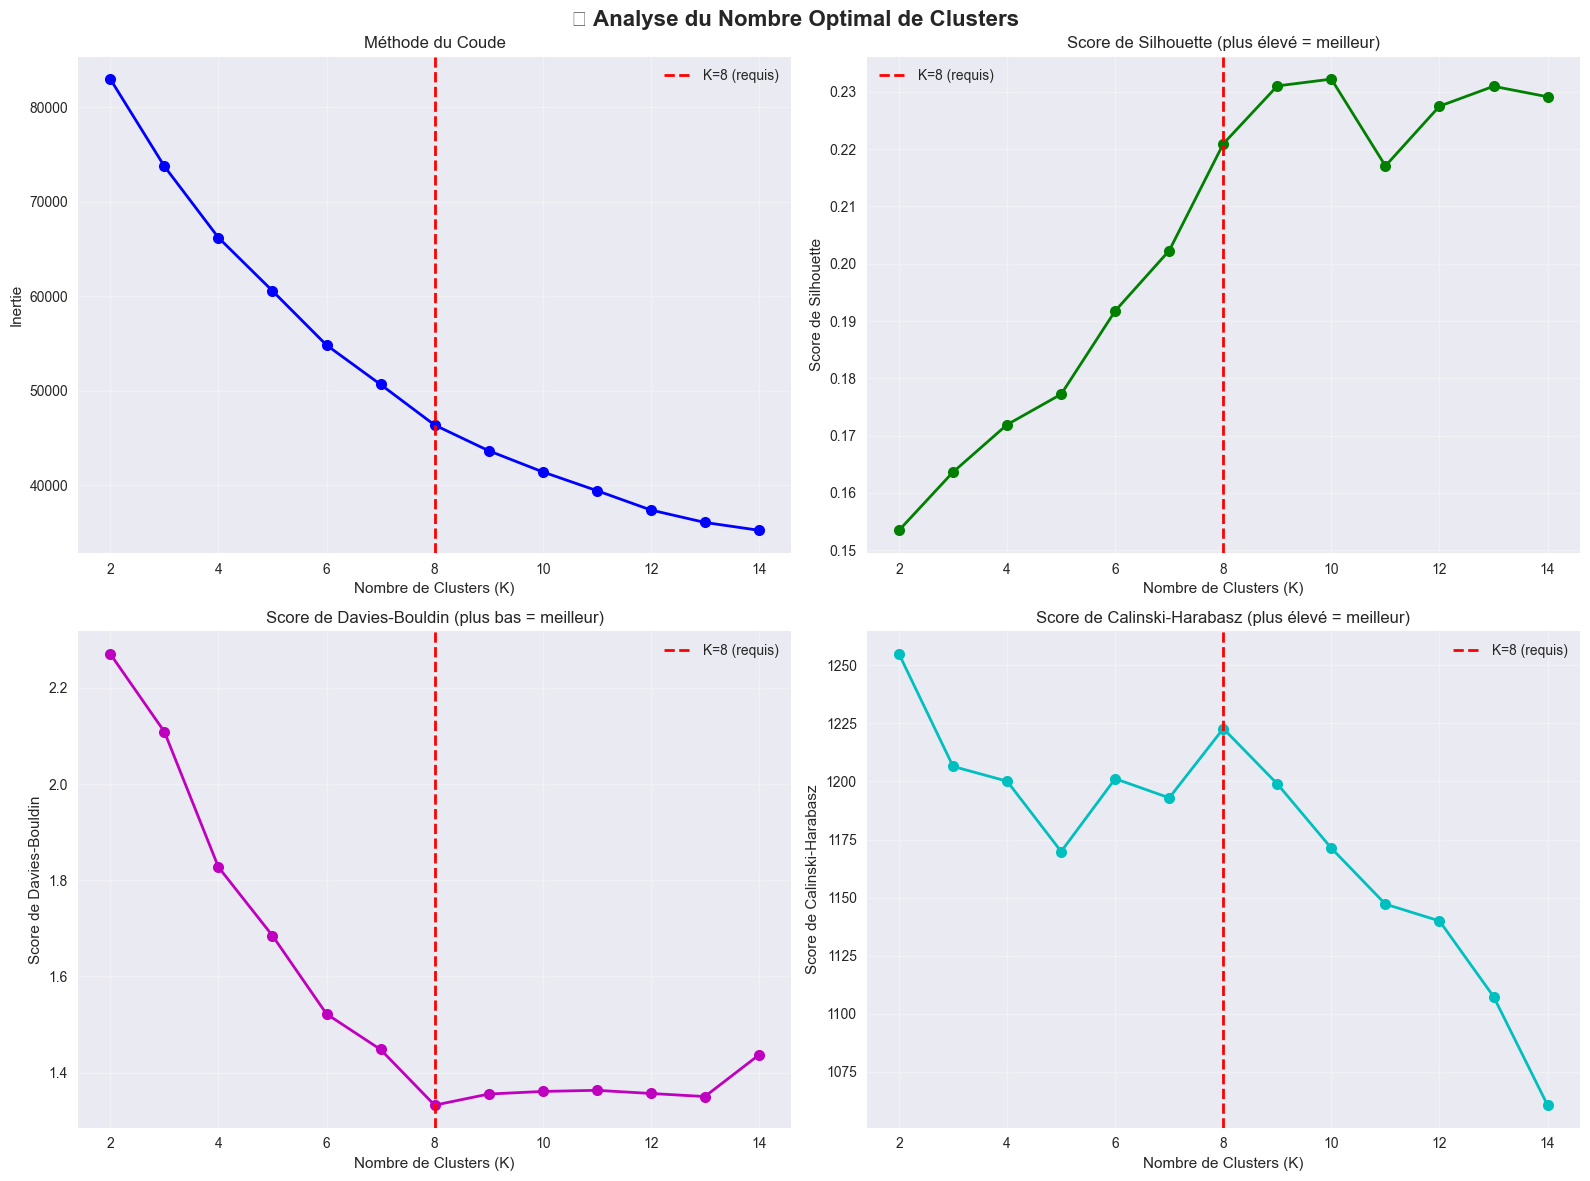


📈 Scores pour K=8 :
  Silhouette: 0.221
  Davies-Bouldin: 1.332
  Calinski-Harabasz: 1222.8

🎯 Segmentation K-means avec 8 clusters...
✅ Segmentation terminée !
📊 Qualité de la segmentation :
  Score de Silhouette: 0.221
  Score de Davies-Bouldin: 1.332
  Score de Calinski-Harabasz: 1222.8

📈 Distribution des segments :
  Segment 0:  736 clients (  9.2%)
  Segment 1: 1333 clients ( 16.7%)
  Segment 2: 1432 clients ( 17.9%)
  Segment 3:  488 clients (  6.1%)
  Segment 4: 2144 clients ( 26.8%)
  Segment 5:  777 clients (  9.7%)
  Segment 6:  354 clients (  4.4%)
  Segment 7:  736 clients (  9.2%)

📊 Visualisation des segments en 2D...


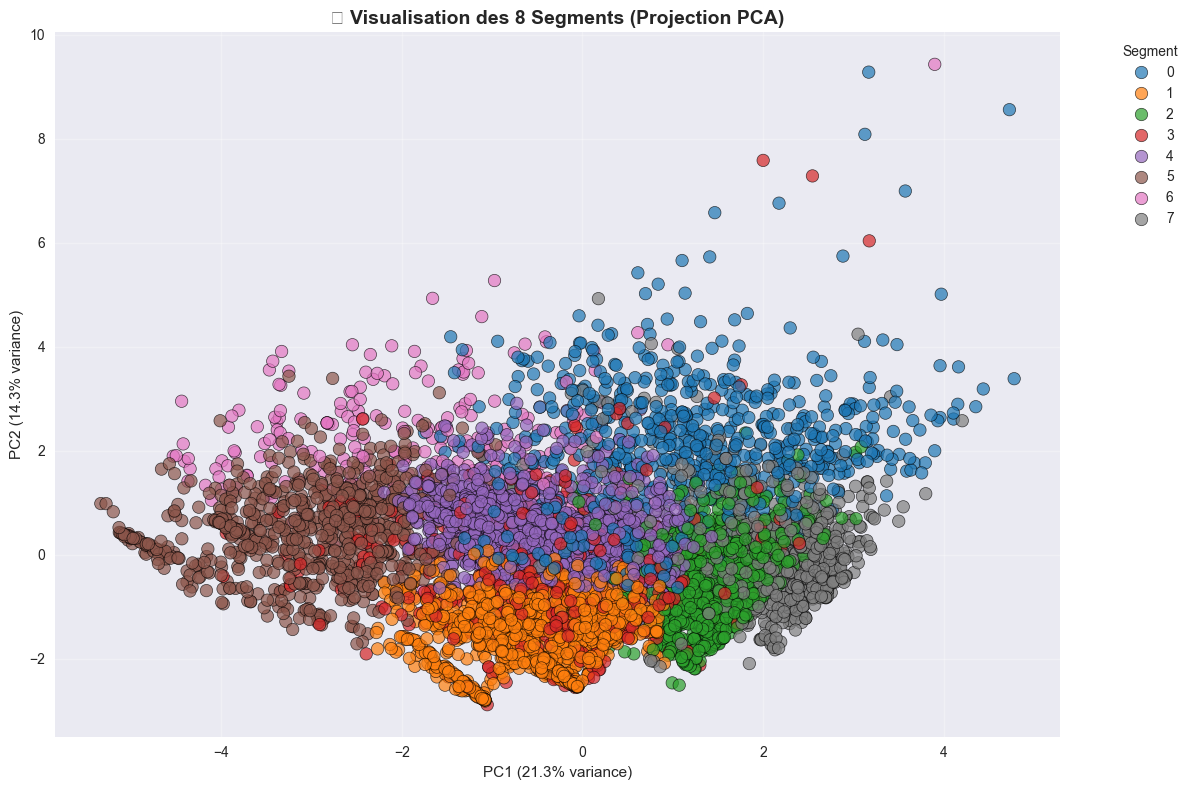


🔍 Analyse des centres des clusters...
📊 Caractéristiques moyennes des centres de segments :
             MMPR   FREQR  POIDS_VAS  POIDS_IN  POIDS_IN_OFFN  POIDS_OPK  \
Segment 0  25.370  13.802      0.082     0.268          0.218      0.463   
Segment 1   6.318   1.535      0.048     0.863          0.070      0.671   
Segment 2  17.606   7.138      0.072     0.339          0.070      0.627   
Segment 3  14.292   4.334      0.752     0.502          0.213      0.487   
Segment 4  15.028   3.729      0.045     0.134          0.150      0.349   
Segment 5   8.061   2.938      0.062     0.606          0.778      0.306   
Segment 6  19.606   4.864      0.093     0.471          0.428      0.360   
Segment 7  19.199   7.073      0.086     0.329          0.100      0.614   

           POIDS_ONG  POIDS_INT  POIDS_ONN  SMART_PHONE  MULTI_EQUIPE  \
Segment 0      0.325      0.037      0.884        0.992         0.020   
Segment 1      0.034      0.010      0.923        0.012         0.209   
Seg

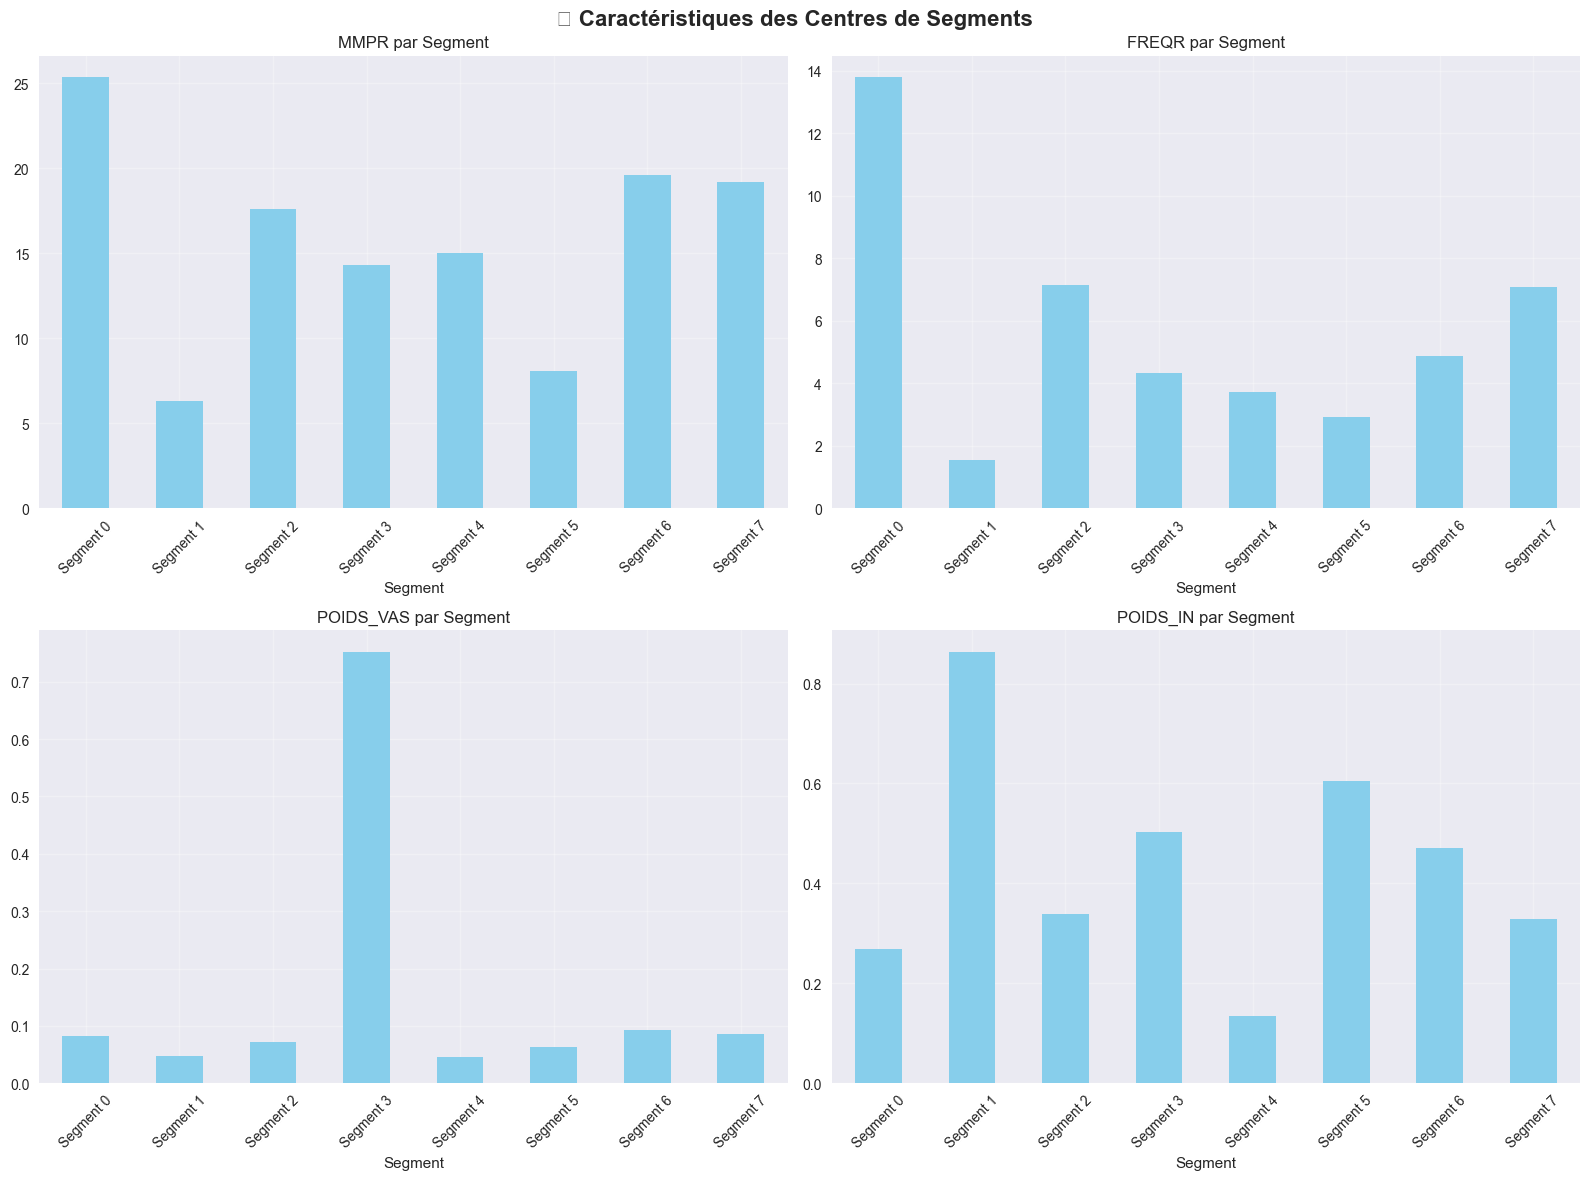


👥 Création des profils de segments...
📋 Profils des segments :
   Segment  Nb Clients  Pourcentage  MMPR Moyen  FREQR Moyen  POIDS_VAS Moyen  \
0        0         736         9.20       25.37        13.80             0.08   
1        1        1333        16.66        6.32         1.53             0.05   
2        2        1432        17.90       17.61         7.14             0.07   
3        3         488         6.10       14.29         4.33             0.75   
4        4        2144        26.80       15.03         3.73             0.05   
5        5         777         9.71        8.06         2.94             0.06   
6        6         354         4.42       19.61         4.86             0.09   
7        7         736         9.20       19.20         7.07             0.09   

   POIDS_IN Moyen  POIDS_IN_OFFN Moyen  POIDS_OPK Moyen  POIDS_ONG Moyen  \
0            0.27                 0.22             0.46             0.32   
1            0.86                 0.07             0.6

In [ ]:
# =============================================================================
# SEGMENTATION K-MEANS - 8 CLUSTERS
# Projet Customer Value Management - inwi
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

class KMeansSegmentation:
    def __init__(self, data_scaled_path):
        """Initialisation de la classe de segmentation"""
        self.data_scaled_path = data_scaled_path
        self.data_scaled = None
        self.kmeans = None
        self.segments = None
        self.segment_analysis = None
        self.optimal_k = 8  # Requis par le projet

    def load_scaled_data(self):
        """Chargement des données normalisées"""
        print("🔄 Chargement des données normalisées...")
        self.data_scaled = pd.read_csv(self.data_scaled_path)
        print(f"✅ Données chargées : {self.data_scaled.shape}")
        return self.data_scaled

    def find_optimal_clusters_analysis(self):
        """Analyse pour trouver le nombre optimal de clusters (même si K=8 est requis)"""
        print("\n🎯 Analyse du nombre optimal de clusters...")

        # Test de différents nombres de clusters
        k_range = range(2, 15)
        inertias = []
        silhouette_scores = []
        davies_bouldin_scores = []
        calinski_harabasz_scores = []

        for k in k_range:
            print(f"  Test K={k}...", end=" ")
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(self.data_scaled)

            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(self.data_scaled, kmeans.labels_))
            davies_bouldin_scores.append(davies_bouldin_score(self.data_scaled, kmeans.labels_))
            calinski_harabasz_scores.append(calinski_harabasz_score(self.data_scaled, kmeans.labels_))
            print("✅")

        # Visualisation des métriques
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('📊 Analyse du Nombre Optimal de Clusters', fontsize=16, fontweight='bold')

        # Méthode du coude
        ax1.plot(k_range, inertias, 'bo-', markersize=8, linewidth=2)
        ax1.axvline(x=self.optimal_k, color='r', linestyle='--', linewidth=2, label=f'K={self.optimal_k} (requis)')
        ax1.set_xlabel('Nombre de Clusters (K)')
        ax1.set_ylabel('Inertie')
        ax1.set_title('Méthode du Coude')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Score de silhouette
        ax2.plot(k_range, silhouette_scores, 'go-', markersize=8, linewidth=2)
        ax2.axvline(x=self.optimal_k, color='r', linestyle='--', linewidth=2, label=f'K={self.optimal_k} (requis)')
        ax2.set_xlabel('Nombre de Clusters (K)')
        ax2.set_ylabel('Score de Silhouette')
        ax2.set_title('Score de Silhouette (plus élevé = meilleur)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Score de Davies-Bouldin
        ax3.plot(k_range, davies_bouldin_scores, 'mo-', markersize=8, linewidth=2)
        ax3.axvline(x=self.optimal_k, color='r', linestyle='--', linewidth=2, label=f'K={self.optimal_k} (requis)')
        ax3.set_xlabel('Nombre de Clusters (K)')
        ax3.set_ylabel('Score de Davies-Bouldin')
        ax3.set_title('Score de Davies-Bouldin (plus bas = meilleur)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Score de Calinski-Harabasz
        ax4.plot(k_range, calinski_harabasz_scores, 'co-', markersize=8, linewidth=2)
        ax4.axvline(x=self.optimal_k, color='r', linestyle='--', linewidth=2, label=f'K={self.optimal_k} (requis)')
        ax4.set_xlabel('Nombre de Clusters (K)')
        ax4.set_ylabel('Score de Calinski-Harabasz')
        ax4.set_title('Score de Calinski-Harabasz (plus élevé = meilleur)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('optimal_clusters_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Affichage des scores pour K=8
        kmeans_8 = KMeans(n_clusters=8, random_state=42, n_init=10)
        kmeans_8.fit(self.data_scaled)

        print(f"\n📈 Scores pour K=8 :")
        print(f"  Silhouette: {silhouette_score(self.data_scaled, kmeans_8.labels_):.3f}")
        print(f"  Davies-Bouldin: {davies_bouldin_score(self.data_scaled, kmeans_8.labels_):.3f}")
        print(f"  Calinski-Harabasz: {calinski_harabasz_score(self.data_scaled, kmeans_8.labels_):.1f}")

        return k_range, inertias, silhouette_scores

    def perform_kmeans_segmentation(self):
        """Réalisation de la segmentation K-means avec K=8"""
        print(f"\n🎯 Segmentation K-means avec {self.optimal_k} clusters...")

        # Application de K-means
        self.kmeans = KMeans(
            n_clusters=self.optimal_k,
            random_state=42,
            n_init=10,
            max_iter=300,
            tol=1e-4
        )

        self.segments = self.kmeans.fit_predict(self.data_scaled)

        # Calcul des métriques de qualité
        silhouette_avg = silhouette_score(self.data_scaled, self.segments)
        davies_bouldin_avg = davies_bouldin_score(self.data_scaled, self.segments)
        calinski_harabasz_avg = calinski_harabasz_score(self.data_scaled, self.segments)

        print(f"✅ Segmentation terminée !")
        print(f"📊 Qualité de la segmentation :")
        print(f"  Score de Silhouette: {silhouette_avg:.3f}")
        print(f"  Score de Davies-Bouldin: {davies_bouldin_avg:.3f}")
        print(f"  Score de Calinski-Harabasz: {calinski_harabasz_avg:.1f}")

        # Distribution des segments
        segment_counts = pd.Series(self.segments).value_counts().sort_index()
        print(f"\n📈 Distribution des segments :")
        for segment, count in segment_counts.items():
            percentage = count / len(self.segments) * 100
            print(f"  Segment {segment}: {count:4d} clients ({percentage:5.1f}%)")

        return self.segments

    def visualize_segments_2d(self):
        """Visualisation des segments en 2D avec PCA"""
        print("\n📊 Visualisation des segments en 2D...")

        # Réduction de dimensionnalité avec PCA
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(self.data_scaled)

        # Création du dataframe pour la visualisation
        df_viz = pd.DataFrame({
            'PC1': data_pca[:, 0],
            'PC2': data_pca[:, 1],
            'Segment': self.segments
        })

        # Visualisation
        plt.figure(figsize=(12, 8))
        scatter = sns.scatterplot(
            data=df_viz,
            x='PC1',
            y='PC2',
            hue='Segment',
            palette='tab10',
            s=80,
            alpha=0.7,
            edgecolor='black',
            linewidth=0.5
        )

        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
        plt.title('🎯 Visualisation des 8 Segments (Projection PCA)', fontsize=14, fontweight='bold')
        plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('segments_2d_visualization.png', dpi=300, bbox_inches='tight')
        plt.show()

        return df_viz, pca

    def analyze_segment_centers(self):
        """Analyse des centres des clusters"""
        print("\n🔍 Analyse des centres des clusters...")

        # Récupération des centres dans l'échelle originale
        scaler = joblib.load('scaler.pkl')
        centers_original = scaler.inverse_transform(self.kmeans.cluster_centers_)

        # Création du dataframe des centres
        feature_names = self.data_scaled.columns
        df_centers = pd.DataFrame(centers_original, columns=feature_names)
        df_centers.index = [f'Segment {i}' for i in range(8)]

        print("📊 Caractéristiques moyennes des centres de segments :")
        print(df_centers.round(3))

        # Visualisation des centres
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🎯 Caractéristiques des Centres de Segments', fontsize=16, fontweight='bold')

        # Variables principales
        main_vars = ['MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN']
        for i, var in enumerate(main_vars):
            row, col = i // 2, i % 2
            df_centers[var].plot(kind='bar', ax=axes[row, col], color='skyblue')
            axes[row, col].set_title(f'{var} par Segment')
            axes[row, col].set_xlabel('Segment')
            axes[row, col].tick_params(axis='x', rotation=45)
            axes[row, col].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('segments_centers.png', dpi=300, bbox_inches='tight')
        plt.show()

        return df_centers

    def create_segment_profiles(self):
        """Création des profils détaillés des segments"""
        print("\n👥 Création des profils de segments...")

        # Ajout des segments au dataframe original
        df_original = pd.read_csv('base_seg_gsm.csv')
        df_original['SEGMENT'] = self.segments

        # Analyse par segment
        segment_profiles = []

        for segment in range(8):
            segment_data = df_original[df_original['SEGMENT'] == segment]

            profile = {
                'Segment': segment,
                'Nb Clients': len(segment_data),
                'Pourcentage': len(segment_data) / len(df_original) * 100,
                'MMPR Moyen': segment_data['MMPR'].mean(),
                'FREQR Moyen': segment_data['FREQR'].mean(),
                'POIDS_VAS Moyen': segment_data['POIDS_VAS'].mean(),
                'POIDS_IN Moyen': segment_data['POIDS_IN'].mean(),
                'POIDS_IN_OFFN Moyen': segment_data['POIDS_IN_OFFN'].mean(),
                'POIDS_OPK Moyen': segment_data['POIDS_OPK'].mean(),
                'POIDS_ONG Moyen': segment_data['POIDS_ONG'].mean(),
                'POIDS_INT Moyen': segment_data['POIDS_INT'].mean(),
                'POIDS_ONN Moyen': segment_data['POIDS_ONN'].mean(),
                'SMART_PHONE %': segment_data['SMART_PHONE'].mean() * 100,
                'MULTI_EQUIPE %': segment_data['MULTI_EQUIPE'].mean() * 100,
                'USERS_INTERNET %': segment_data['USERS_INTERNET'].mean() * 100
            }

            segment_profiles.append(profile)

        # Création du dataframe des profils
        self.segment_analysis = pd.DataFrame(segment_profiles)

        print("📋 Profils des segments :")
        print(self.segment_analysis.round(2))

        return self.segment_analysis

    def save_results(self):
        """Sauvegarde des résultats de la segmentation"""
        print("\n💾 Sauvegarde des résultats...")

        # Sauvegarde du modèle K-means
        joblib.dump(self.kmeans, 'kmeans_model.pkl')
        print("✅ Modèle K-means sauvegardé dans 'kmeans_model.pkl'")

        # Sauvegarde des segments
        df_original = pd.read_csv('base_seg_gsm.csv')
        df_original['SEGMENT'] = self.segments
        df_original.to_csv('clients_with_segments.csv', index=False)
        print("✅ Fichier 'clients_with_segments.csv' sauvegardé")

        # Sauvegarde de l'analyse des segments
        if self.segment_analysis is not None:
            self.segment_analysis.to_csv('segments_profiles.csv', index=False)
            print("✅ Fichier 'segments_profiles.csv' sauvegardé")

        # Sauvegarde des segments séparés
        for segment in range(8):
            segment_data = df_original[df_original['SEGMENT'] == segment]
            segment_data.to_csv(f'segment_{segment}_clients.csv', index=False)

        print("✅ Fichiers individuels des segments sauvegardés")

    def run_complete_segmentation(self):
        """Lancement du processus complet de segmentation"""
        print("🚀 DÉBUT DE LA SEGMENTATION K-MEANS")
        print("=" * 60)

        # 1. Chargement des données
        self.load_scaled_data()

        # 2. Analyse du nombre optimal de clusters
        k_range, inertias, silhouette_scores = self.find_optimal_clusters_analysis()

        # 3. Segmentation K-means
        segments = self.perform_kmeans_segmentation()

        # 4. Visualisation 2D
        df_viz, pca = self.visualize_segments_2d()

        # 5. Analyse des centres
        df_centers = self.analyze_segment_centers()

        # 6. Création des profils
        segment_profiles = self.create_segment_profiles()

        # 7. Sauvegarde des résultats
        self.save_results()

        print("\n🎉 SEGMENTATION TERMINÉE AVEC SUCCÈS !")
        print("=" * 60)
        print("📁 Fichiers générés :")
        print("  - optimal_clusters_analysis.png")
        print("  - segments_2d_visualization.png")
        print("  - segments_centers.png")
        print("  - kmeans_model.pkl")
        print("  - clients_with_segments.csv")
        print("  - segments_profiles.csv")
        print("  - segment_0_clients.csv à segment_7_clients.csv")

        return segments, segment_profiles, df_centers

# =============================================================================
# UTILISATION
# =============================================================================

if __name__ == "__main__":
    # Initialisation
    segmentation = KMeansSegmentation('data_scaled.csv')

    # Lancement de la segmentation complète
    segments, profiles, centers = segmentation.run_complete_segmentation()

    print("\n🎯 Les 8 segments sont prêts pour l'analyse marketing !")


🚀 DÉBUT DU PROFILAGE DES SEGMENTS
🔄 Chargement des données avec segments...
✅ Données chargées : 8000 clients
📊 Colonnes : ['ID', 'MMPR', 'FREQR', 'POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN', 'POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN', 'SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET', 'SEGMENT']

👥 Création des profils détaillés des segments...
📋 Profils détaillés créés :
   Segment  Nb Clients  Pourcentage  MMPR_Moyen  MMPR_Median  MMPR_Std  \
0        0         736         9.20       25.37        20.00     19.16   
1        1        1333        16.66        6.32         0.00      7.55   
2        2        1432        17.90       17.61        16.82      7.39   
3        3         488         6.10       14.29        10.00     16.94   
4        4        2144        26.80       15.03        15.00      8.61   
5        5         777         9.71        8.06        10.00      7.73   
6        6         354         4.42       19.61        15.00     20.09   
7        7         736       

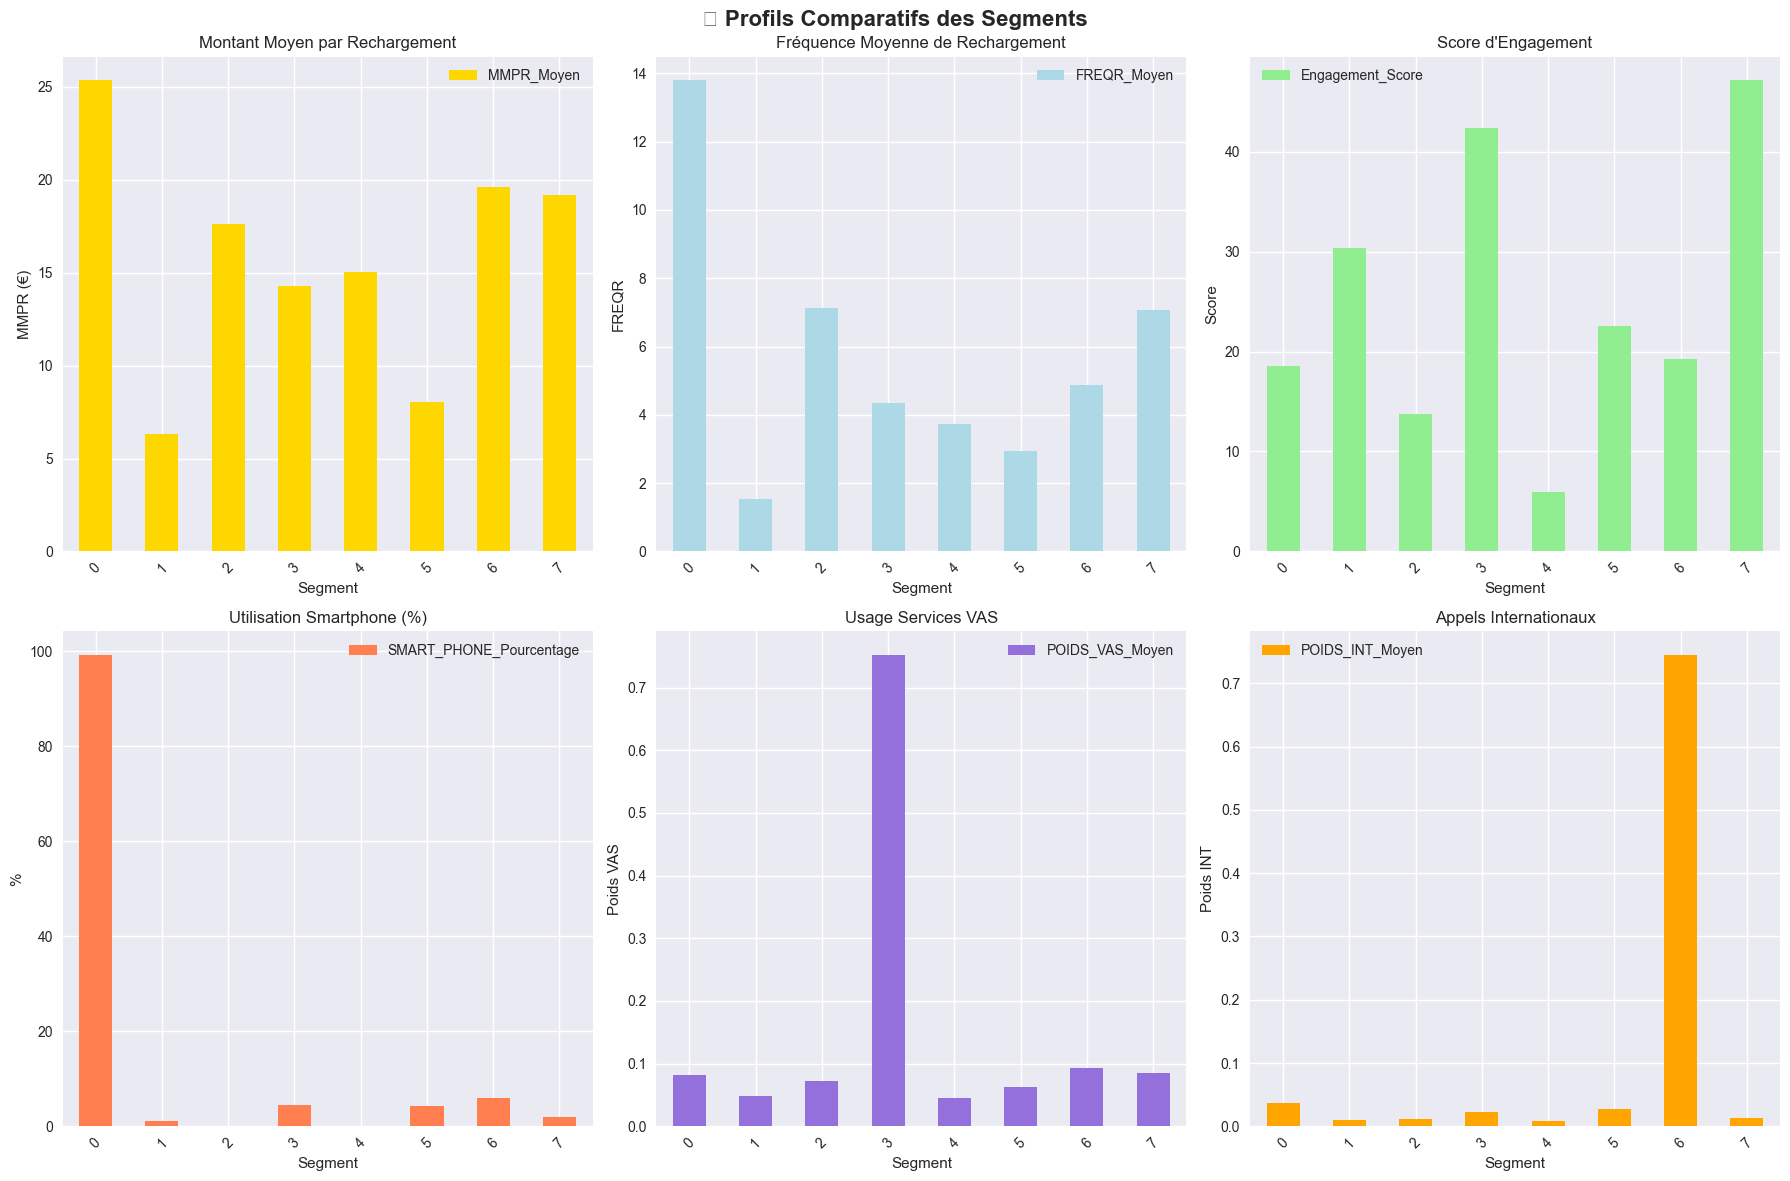

🕸️ Création du graphique radar...


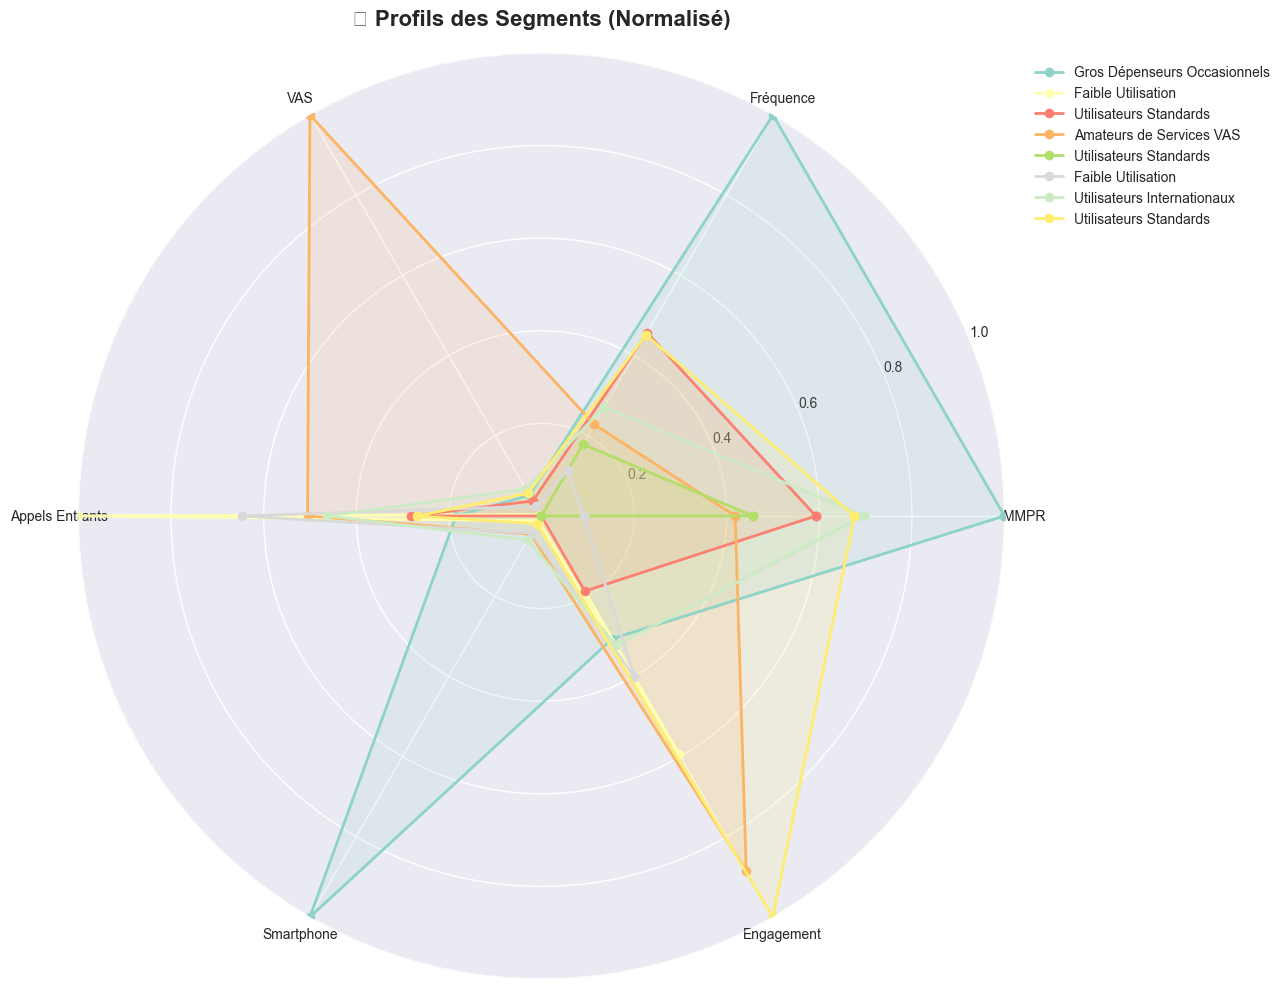

🔥 Création de la heatmap des caractéristiques...


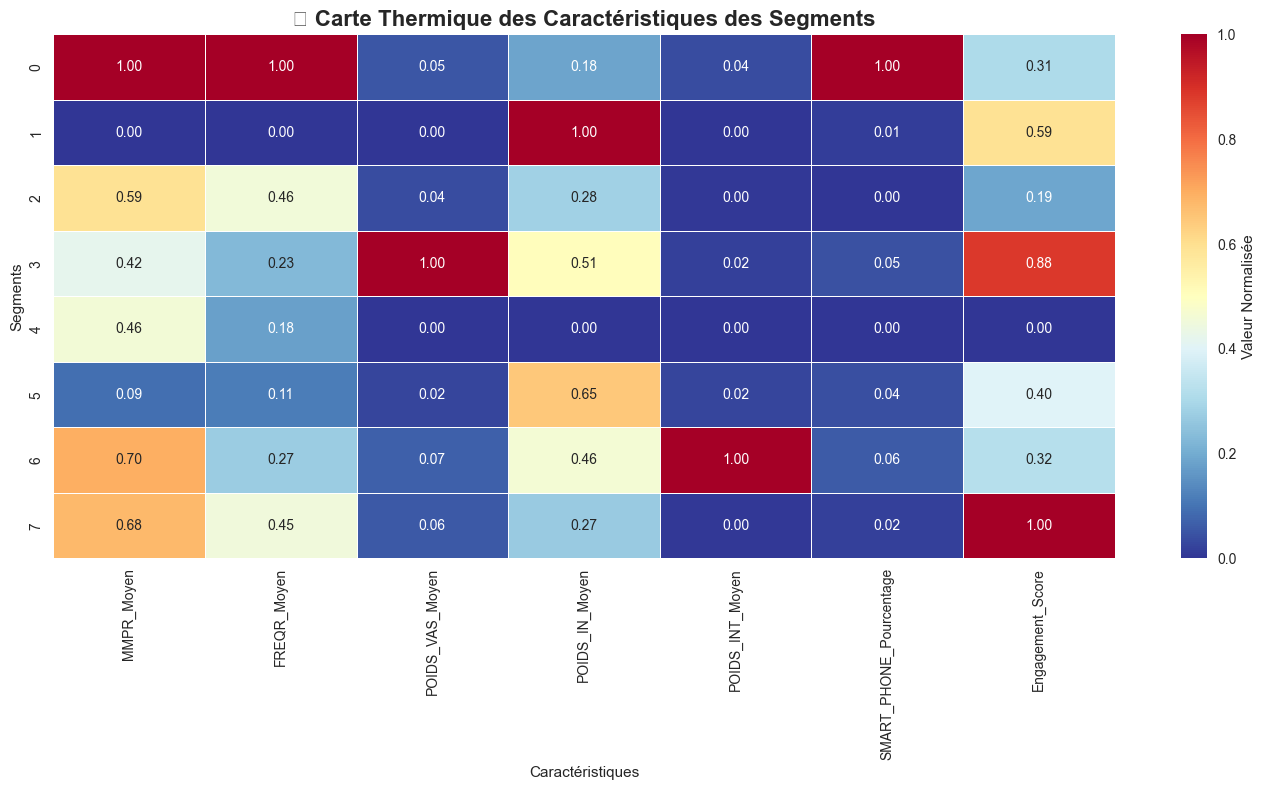


📊 Création de la matrice de segmentation...


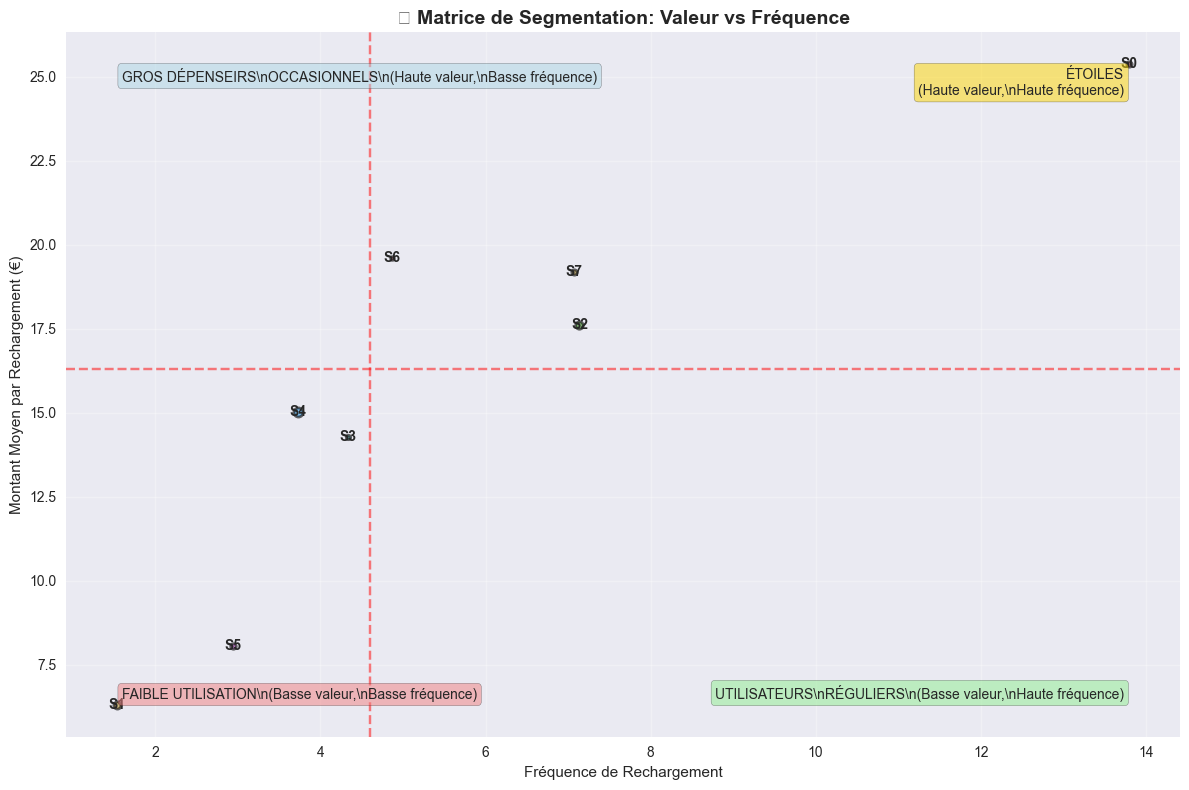


📝 Génération des résumés des segments...

🎯 SEGMENT 0: Gros Dépenseurs Occasionnels
📊 Taille: 736 clients (9.2%)
💰 Rechargement moyen: 25.37€
🔄 Fréquence moyenne: 13.8 rechargements
📱 Smartphone: 99.2%
🌐 Internet: 20.8%
🎮 Services VAS: 0.082
📞 Appels internationaux: 0.037
⭐ Score d'engagement: 18.6/100


🎯 SEGMENT 1: Faible Utilisation
📊 Taille: 1333 clients (16.7%)
💰 Rechargement moyen: 6.32€
🔄 Fréquence moyenne: 1.5 rechargements
📱 Smartphone: 1.2%
🌐 Internet: 0.1%
🎮 Services VAS: 0.048
📞 Appels internationaux: 0.010
⭐ Score d'engagement: 30.4/100


🎯 SEGMENT 2: Utilisateurs Standards
📊 Taille: 1432 clients (17.9%)
💰 Rechargement moyen: 17.61€
🔄 Fréquence moyenne: 7.1 rechargements
📱 Smartphone: 0.0%
🌐 Internet: 0.0%
🎮 Services VAS: 0.072
📞 Appels internationaux: 0.012
⭐ Score d'engagement: 13.7/100


🎯 SEGMENT 3: Amateurs de Services VAS
📊 Taille: 488 clients (6.1%)
💰 Rechargement moyen: 14.29€
🔄 Fréquence moyenne: 4.3 rechargements
📱 Smartphone: 4.5%
🌐 Internet: 1.8%
🎮 Services VA

In [ ]:
# =============================================================================
# PROFILAGE DÉTAILLÉ DES SEGMENTS
# Projet Customer Value Management - inwi
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

class SegmentProfiler:
    def __init__(self, segments_path):
        """Initialisation de la classe de profilage"""
        self.segments_path = segments_path
        self.df_segments = None
        self.profiles = None
        self.segment_names = {}

    def load_segments_data(self):
        """Chargement des données avec segments"""
        print("🔄 Chargement des données avec segments...")
        self.df_segments = pd.read_csv(self.segments_path)
        print(f"✅ Données chargées : {self.df_segments.shape[0]} clients")
        print(f"📊 Colonnes : {list(self.df_segments.columns)}")
        return self.df_segments

    def create_detailed_profiles(self):
        """Création des profils détaillés pour chaque segment"""
        print("\n👥 Création des profils détaillés des segments...")

        # Variables pour l'analyse
        variables = {
            'monetaire': ['MMPR'],
            'frequence': ['FREQR'],
            'usage': ['POIDS_VAS', 'POIDS_IN', 'POIDS_IN_OFFN', 'POIDS_OPK', 'POIDS_ONG', 'POIDS_INT', 'POIDS_ONN'],
            'equipement': ['SMART_PHONE', 'MULTI_EQUIPE', 'USERS_INTERNET']
        }

        profiles = []

        for segment in sorted(self.df_segments['SEGMENT'].unique()):
            segment_data = self.df_segments[self.df_segments['SEGMENT'] == segment]

            # Profil de base
            profile = {
                'Segment': segment,
                'Nb Clients': len(segment_data),
                'Pourcentage': len(segment_data) / len(self.df_segments) * 100
            }

            # Variables monétaires
            profile['MMPR_Moyen'] = segment_data['MMPR'].mean()
            profile['MMPR_Median'] = segment_data['MMPR'].median()
            profile['MMPR_Std'] = segment_data['MMPR'].std()

            # Fréquence
            profile['FREQR_Moyen'] = segment_data['FREQR'].mean()
            profile['FREQR_Median'] = segment_data['FREQR'].median()

            # Variables d'usage (poids)
            for var in variables['usage']:
                profile[f'{var}_Moyen'] = segment_data[var].mean()

            # Variables d'équipement (pourcentages)
            for var in variables['equipement']:
                profile[f'{var}_Pourcentage'] = segment_data[var].mean() * 100

            # Statistiques additionnelles
            profile['MMPR_Total_Estime'] = profile['MMPR_Moyen'] * profile['FREQR_Moyen'] * profile['Nb Clients']
            profile['Engagement_Score'] = self.calculate_engagement_score(segment_data)

            profiles.append(profile)

        self.profiles = pd.DataFrame(profiles)

        print("📋 Profils détaillés créés :")
        print(self.profiles.round(2))

        return self.profiles

    def calculate_engagement_score(self, segment_data):
        """Calcul d'un score d'engagement pour le segment"""
        # Score basé sur l'usage des services
        vas_score = segment_data['POIDS_VAS'].mean() * 100
        incoming_score = segment_data['POIDS_IN'].mean() * 100
        internet_score = segment_data['USERS_INTERNET'].mean() * 100

        engagement_score = (vas_score + incoming_score + internet_score) / 3
        return engagement_score

    def name_segments(self):
        """Attribution de noms marketing aux segments basés sur leurs caractéristiques"""
        print("\n🏷️ Attribution de noms marketing aux segments...")

        segment_names = {}

        for _, profile in self.profiles.iterrows():
            segment = profile['Segment']

            # Logique de nommage basée sur les caractéristiques
            if profile['MMPR_Moyen'] > 30 and profile['FREQR_Moyen'] > 15:
                name = "Gros Dépenseurs Fréquents"
            elif profile['MMPR_Moyen'] > 25:
                name = "Gros Dépenseurs Occasionnels"
            elif profile['FREQR_Moyen'] > 12:
                name = "Utilisateurs Réguliers"
            elif profile['SMART_PHONE_Pourcentage'] > 50:
                name = "Utilisateurs Smartphones"
            elif profile['POIDS_VAS_Moyen'] > 0.1:
                name = "Amateurs de Services VAS"
            elif profile['POIDS_INT_Moyen'] > 0.5:
                name = "Utilisateurs Internationaux"
            elif profile['MMPR_Moyen'] < 10 and profile['FREQR_Moyen'] < 5:
                name = "Faible Utilisation"
            else:
                name = "Utilisateurs Standards"

            segment_names[segment] = name

        self.segment_names = segment_names

        print("📝 Noms des segments :")
        for segment, name in segment_names.items():
            print(f"  Segment {segment}: {name}")

        return segment_names

    def visualize_segment_profiles(self):
        """Visualisation comparative des profils de segments"""
        print("\n📊 Visualisation des profils de segments...")

        # Graphique 1: Caractéristiques principales
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('🎯 Profils Comparatifs des Segments', fontsize=16, fontweight='bold')

        # MMPR par segment
        self.profiles.plot(kind='bar', x='Segment', y='MMPR_Moyen', ax=axes[0,0], color='gold')
        axes[0,0].set_title('Montant Moyen par Rechargement')
        axes[0,0].set_ylabel('MMPR (€)')
        axes[0,0].tick_params(axis='x', rotation=45)

        # Fréquence par segment
        self.profiles.plot(kind='bar', x='Segment', y='FREQR_Moyen', ax=axes[0,1], color='lightblue')
        axes[0,1].set_title('Fréquence Moyenne de Rechargement')
        axes[0,1].set_ylabel('FREQR')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Score d'engagement
        self.profiles.plot(kind='bar', x='Segment', y='Engagement_Score', ax=axes[0,2], color='lightgreen')
        axes[0,2].set_title('Score d\'Engagement')
        axes[0,2].set_ylabel('Score')
        axes[0,2].tick_params(axis='x', rotation=45)

        # Smartphone usage
        self.profiles.plot(kind='bar', x='Segment', y='SMART_PHONE_Pourcentage', ax=axes[1,0], color='coral')
        axes[1,0].set_title('Utilisation Smartphone (%)')
        axes[1,0].set_ylabel('%')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Services VAS
        self.profiles.plot(kind='bar', x='Segment', y='POIDS_VAS_Moyen', ax=axes[1,1], color='mediumpurple')
        axes[1,1].set_title('Usage Services VAS')
        axes[1,1].set_ylabel('Poids VAS')
        axes[1,1].tick_params(axis='x', rotation=45)

        # Appels internationaux
        self.profiles.plot(kind='bar', x='Segment', y='POIDS_INT_Moyen', ax=axes[1,2], color='orange')
        axes[1,2].set_title('Appels Internationaux')
        axes[1,2].set_ylabel('Poids INT')
        axes[1,2].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig('segments_profiles_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Graphique 2: Radar chart pour tous les segments
        self.create_radar_chart()

        # Graphique 3: Matrice de caractéristiques
        self.create_characteristics_heatmap()

    def create_radar_chart(self):
        """Création d'un graphique radar pour comparer les segments"""
        print("🕸️ Création du graphique radar...")

        # Variables pour le radar
        radar_vars = ['MMPR_Moyen', 'FREQR_Moyen', 'POIDS_VAS_Moyen',
                     'POIDS_IN_Moyen', 'SMART_PHONE_Pourcentage', 'Engagement_Score']

        # Normalisation des données pour le radar
        radar_data = self.profiles[radar_vars].copy()
        radar_normalized = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

        # Création du graphique
        fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

        angles = np.linspace(0, 2 * np.pi, len(radar_vars), endpoint=False).tolist()
        angles += angles[:1]  # Fermeture du cercle

        colors = plt.cm.Set3(np.linspace(0, 1, 8))

        for i, (_, profile) in enumerate(self.profiles.iterrows()):
            values = radar_normalized.iloc[i].tolist()
            values += values[:1]  # Fermeture du cercle

            segment_name = self.segment_names.get(profile['Segment'], f"Segment {profile['Segment']}")

            ax.plot(angles, values, 'o-', linewidth=2, label=segment_name, color=colors[i])
            ax.fill(angles, values, alpha=0.15, color=colors[i])

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(['MMPR', 'Fréquence', 'VAS', 'Appels Entrants', 'Smartphone', 'Engagement'])
        ax.set_ylim(0, 1)
        ax.set_title('🎯 Profils des Segments (Normalisé)', size=16, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        ax.grid(True)

        plt.tight_layout()
        plt.savefig('segments_radar_chart.png', dpi=300, bbox_inches='tight')
        plt.show()

    def create_characteristics_heatmap(self):
        """Création d'une heatmap des caractéristiques des segments"""
        print("🔥 Création de la heatmap des caractéristiques...")

        # Sélection des variables pour la heatmap
        heatmap_vars = ['MMPR_Moyen', 'FREQR_Moyen', 'POIDS_VAS_Moyen', 'POIDS_IN_Moyen',
                      'POIDS_INT_Moyen', 'SMART_PHONE_Pourcentage', 'Engagement_Score']

        heatmap_data = self.profiles.set_index('Segment')[heatmap_vars]

        # Normalisation pour meilleure visualisation
        heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

        # Création de la heatmap
        plt.figure(figsize=(14, 8))
        sns.heatmap(heatmap_normalized,
                   annot=True,
                   cmap='RdYlBu_r',
                   center=0.5,
                   fmt='.2f',
                   cbar_kws={'label': 'Valeur Normalisée'},
                   linewidths=0.5)

        plt.title('🔥 Carte Thermique des Caractéristiques des Segments', fontsize=16, fontweight='bold')
        plt.xlabel('Caractéristiques')
        plt.ylabel('Segments')
        plt.tight_layout()
        plt.savefig('segments_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

    def generate_segment_summary(self):
        """Génération d'un résumé textuel pour chaque segment"""
        print("\n📝 Génération des résumés des segments...")

        summaries = []

        for _, profile in self.profiles.iterrows():
            segment = profile['Segment']
            name = self.segment_names.get(segment, f"Segment {segment}")

            summary = f"""
🎯 SEGMENT {segment}: {name}
📊 Taille: {profile['Nb Clients']} clients ({profile['Pourcentage']:.1f}%)
💰 Rechargement moyen: {profile['MMPR_Moyen']:.2f}€
🔄 Fréquence moyenne: {profile['FREQR_Moyen']:.1f} rechargements
📱 Smartphone: {profile['SMART_PHONE_Pourcentage']:.1f}%
🌐 Internet: {profile['USERS_INTERNET_Pourcentage']:.1f}%
🎮 Services VAS: {profile['POIDS_VAS_Moyen']:.3f}
📞 Appels internationaux: {profile['POIDS_INT_Moyen']:.3f}
⭐ Score d'engagement: {profile['Engagement_Score']:.1f}/100
"""
            summaries.append(summary)
            print(summary)

        return summaries

    def create_segment_matrix(self):
        """Création d'une matrice de segmentation (valeur vs fréquence)"""
        print("\n📊 Création de la matrice de segmentation...")

        # Création des catégories
        self.profiles['Valeur_Catégorie'] = pd.cut(self.profiles['MMPR_Moyen'],
                                                 bins=3, labels=['Faible', 'Moyenne', 'Élevée'])
        self.profiles['Fréquence_Catégorie'] = pd.cut(self.profiles['FREQR_Moyen'],
                                                   bins=3, labels=['Basse', 'Moyenne', 'Élevée'])

        # Création de la matrice
        fig, ax = plt.subplots(figsize=(12, 8))

        # Positionnement des segments sur la matrice
        for _, profile in self.profiles.iterrows():
            x = profile['FREQR_Moyen']
            y = profile['MMPR_Moyen']
            size = profile['Nb Clients'] / 50  # Taille proportionnelle au nombre de clients

            segment_name = self.segment_names.get(profile['Segment'], f"S{profile['Segment']}")

            ax.scatter(x, y, s=size, alpha=0.6, edgecolors='black', linewidth=2)
            ax.annotate(f"S{profile['Segment']}", (x, y), ha='center', va='center', fontweight='bold')

        # Quadrants
        ax.axhline(y=self.profiles['MMPR_Moyen'].median(), color='red', linestyle='--', alpha=0.5)
        ax.axvline(x=self.profiles['FREQR_Moyen'].median(), color='red', linestyle='--', alpha=0.5)

        # Labels des quadrants
        ax.text(0.95, 0.95, 'ÉTOILES\n(Haute valeur,\\nHaute fréquence)',
               transform=ax.transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round', facecolor='gold', alpha=0.5))
        ax.text(0.05, 0.95, 'GROS DÉPENSEIRS\\nOCCASIONNELS\\n(Haute valeur,\\nBasse fréquence)',
               transform=ax.transAxes, ha='left', va='top',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        ax.text(0.05, 0.05, 'FAIBLE UTILISATION\\n(Basse valeur,\\nBasse fréquence)',
               transform=ax.transAxes, ha='left', va='bottom',
               bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
        ax.text(0.95, 0.05, 'UTILISATEURS\\nRÉGULIERS\\n(Basse valeur,\\nHaute fréquence)',
               transform=ax.transAxes, ha='right', va='bottom',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

        ax.set_xlabel('Fréquence de Rechargement')
        ax.set_ylabel('Montant Moyen par Rechargement (€)')
        ax.set_title('🎯 Matrice de Segmentation: Valeur vs Fréquence', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('segments_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()

    def save_profiling_results(self):
        """Sauvegarde des résultats du profilage"""
        print("\n💾 Sauvegarde des résultats du profilage...")

        # Sauvegarde des profils
        self.profiles.to_csv('segments_detailed_profiles.csv', index=False)
        print("✅ Fichier 'segments_detailed_profiles.csv' sauvegardé")

        # Sauvegarde des noms de segments
        names_df = pd.DataFrame(list(self.segment_names.items()), columns=['Segment', 'Nom'])
        names_df.to_csv('segments_names.csv', index=False)
        print("✅ Fichier 'segments_names.csv' sauvegardé")

        # Sauvegarde des résumés
        summaries = self.generate_segment_summary()
        with open('segments_summaries.txt', 'w', encoding='utf-8') as f:
            f.write("RÉSUMÉS DES SEGMENTS - PROJET CVM INWI\n")
            f.write("=" * 50 + "\n\n")
            for summary in summaries:
                f.write(summary + "\n")
        print("✅ Fichier 'segments_summaries.txt' sauvegardé")

    def run_complete_profiling(self):
        """Lancement du processus complet de profilage"""
        print("🚀 DÉBUT DU PROFILAGE DES SEGMENTS")
        print("=" * 60)

        # 1. Chargement des données
        self.load_segments_data()

        # 2. Création des profils détaillés
        profiles = self.create_detailed_profiles()

        # 3. Nomination des segments
        segment_names = self.name_segments()

        # 4. Visualisation des profils
        self.visualize_segment_profiles()

        # 5. Matrice de segmentation
        self.create_segment_matrix()

        # 6. Génération des résumés
        summaries = self.generate_segment_summary()

        # 7. Sauvegarde des résultats
        self.save_profiling_results()

        print("\n🎉 PROFILAGE TERMINÉ AVEC SUCCÈS !")
        print("=" * 60)
        print("📁 Fichiers générés :")
        print("  - segments_profiles_comparison.png")
        print("  - segments_radar_chart.png")
        print("  - segments_heatmap.png")
        print("  - segments_matrix.png")
        print("  - segments_detailed_profiles.csv")
        print("  - segments_names.csv")
        print("  - segments_summaries.txt")

        return profiles, segment_names, summaries

# =============================================================================
# UTILISATION
# =============================================================================

if __name__ == "__main__":
    # Initialisation
    profiler = SegmentProfiler('clients_with_segments.csv')

    # Lancement du profilage complet
    profiles, names, summaries = profiler.run_complete_profiling()

    print("\n🎯 Les segments sont maintenant profilés et prêts pour le plan marketing CVM !")


🚀 DÉBUT DE LA CRÉATION DU PLAN CVM
🔄 Chargement des données de segments...
✅ Données chargées : 8 segments

🎯 Définition des stratégies par segment...

🚀 Création des actions marketing CVM...

💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


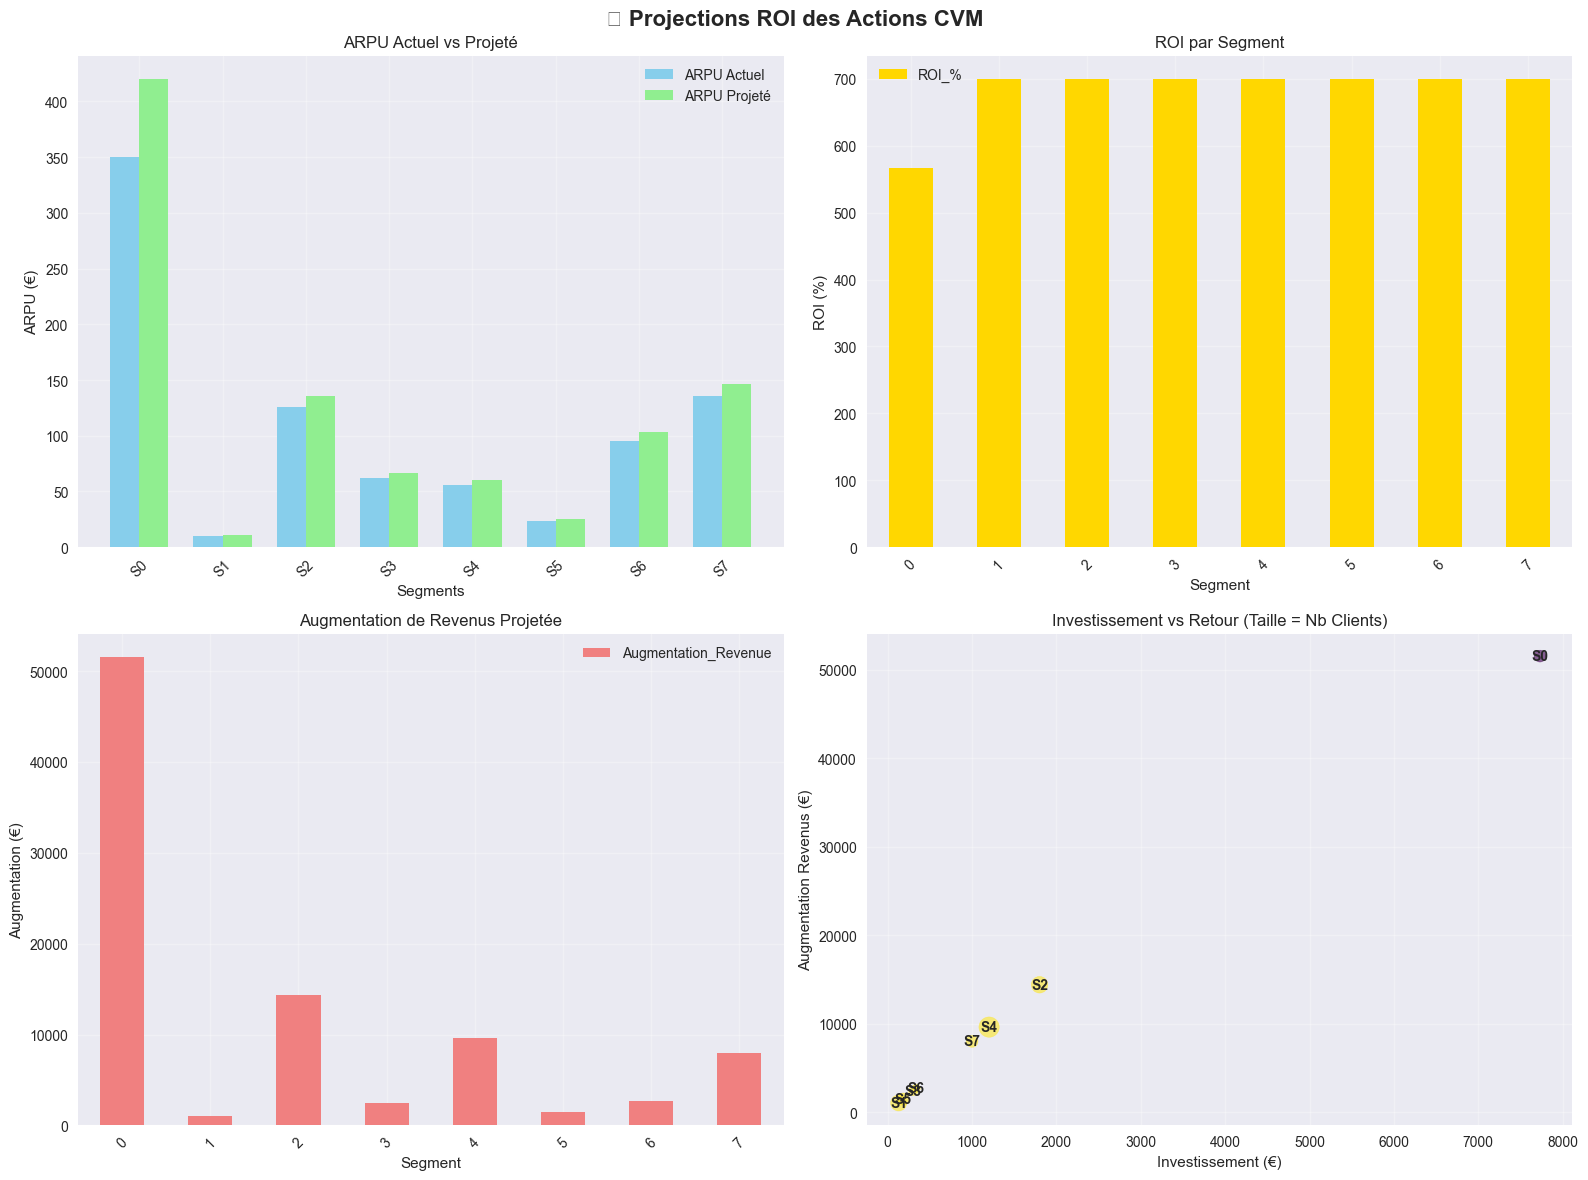


📅 Création du calendrier d'implémentation...
📊 Visualisation du calendrier...


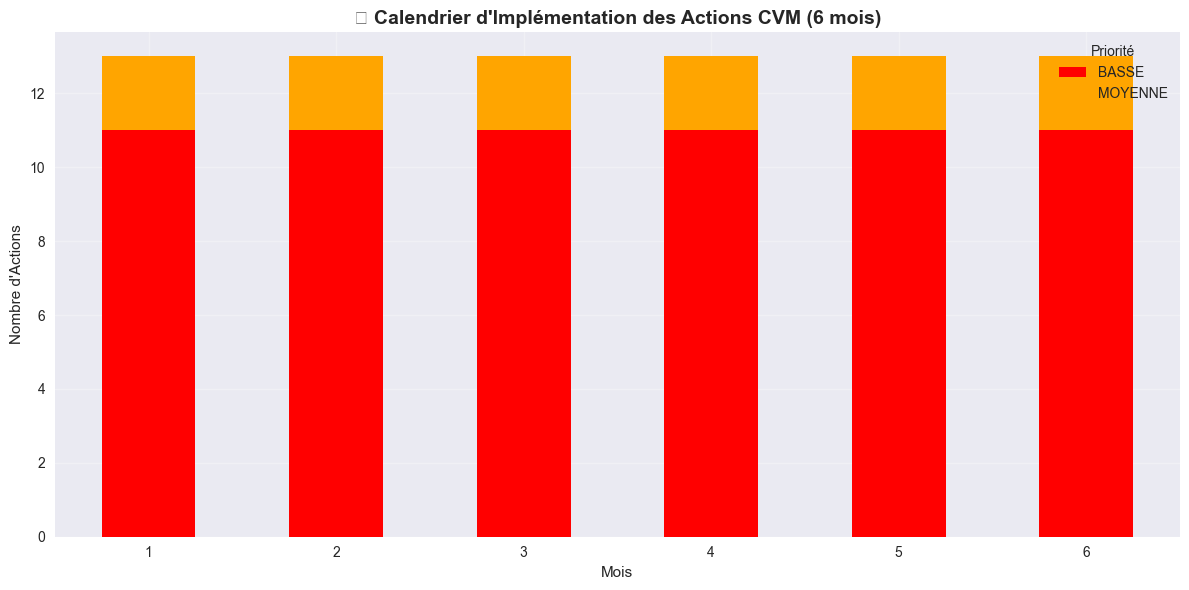


📊 Création du dashboard KPI...


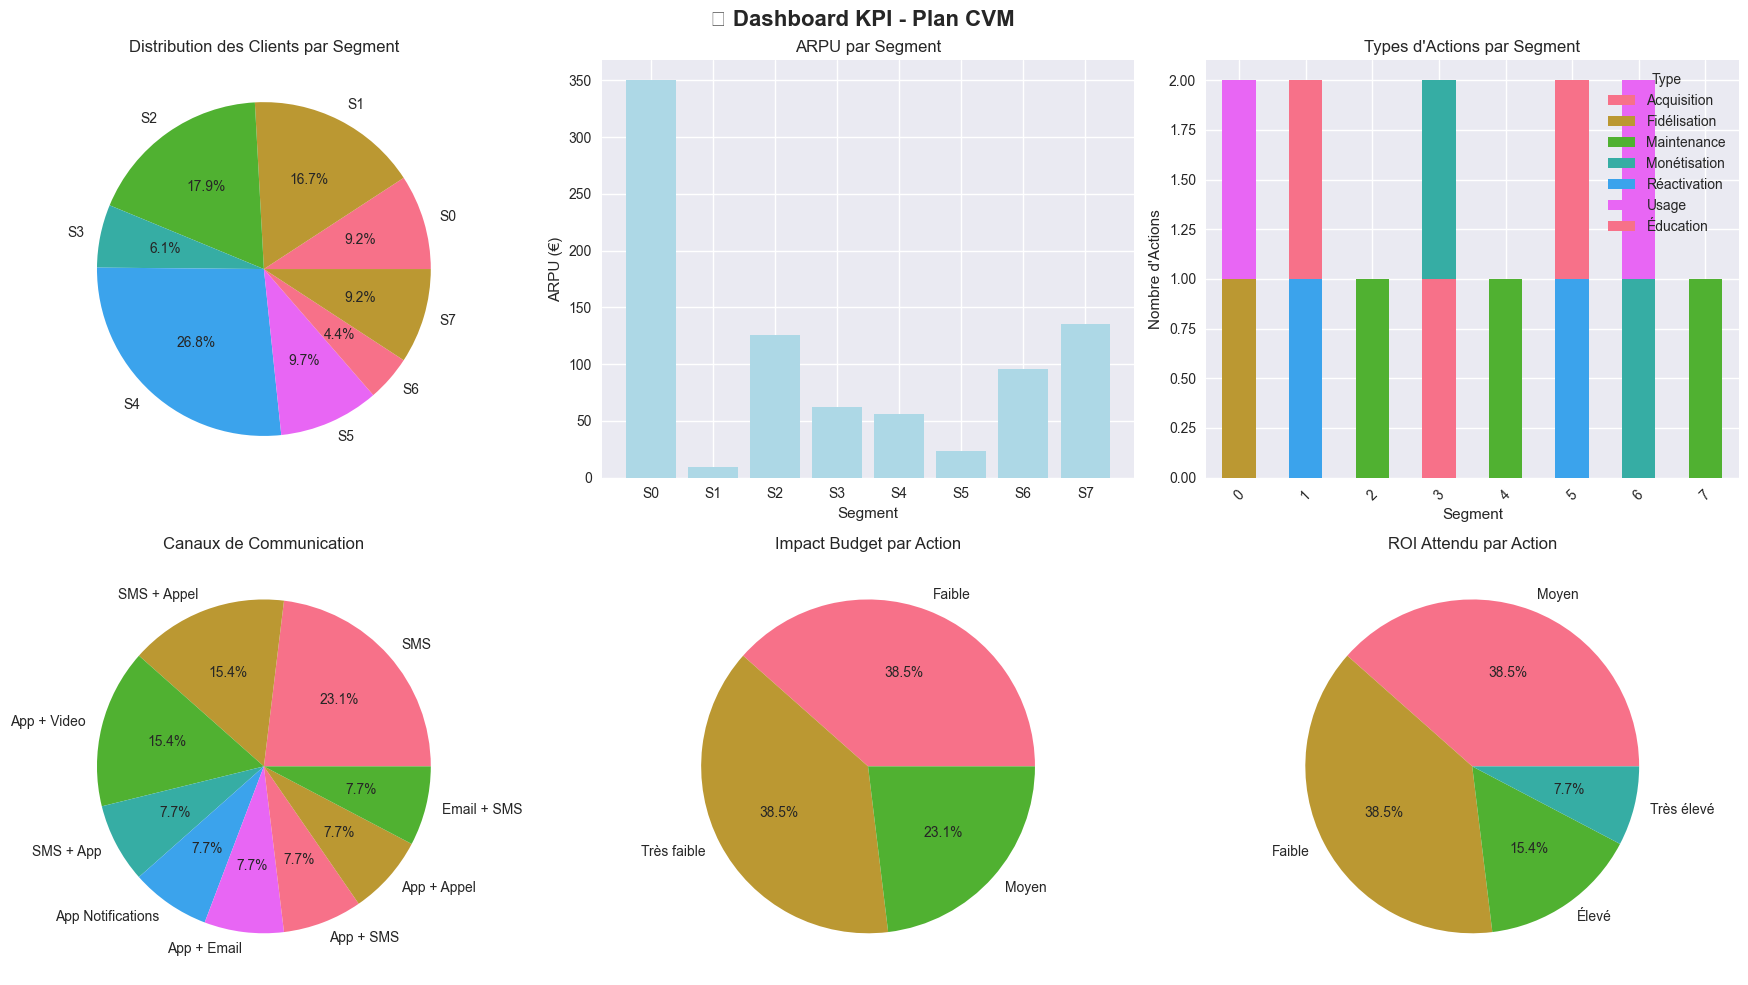


💾 Sauvegarde du plan CVM...
✅ Fichier 'cvm_marketing_actions.csv' sauvegardé

💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


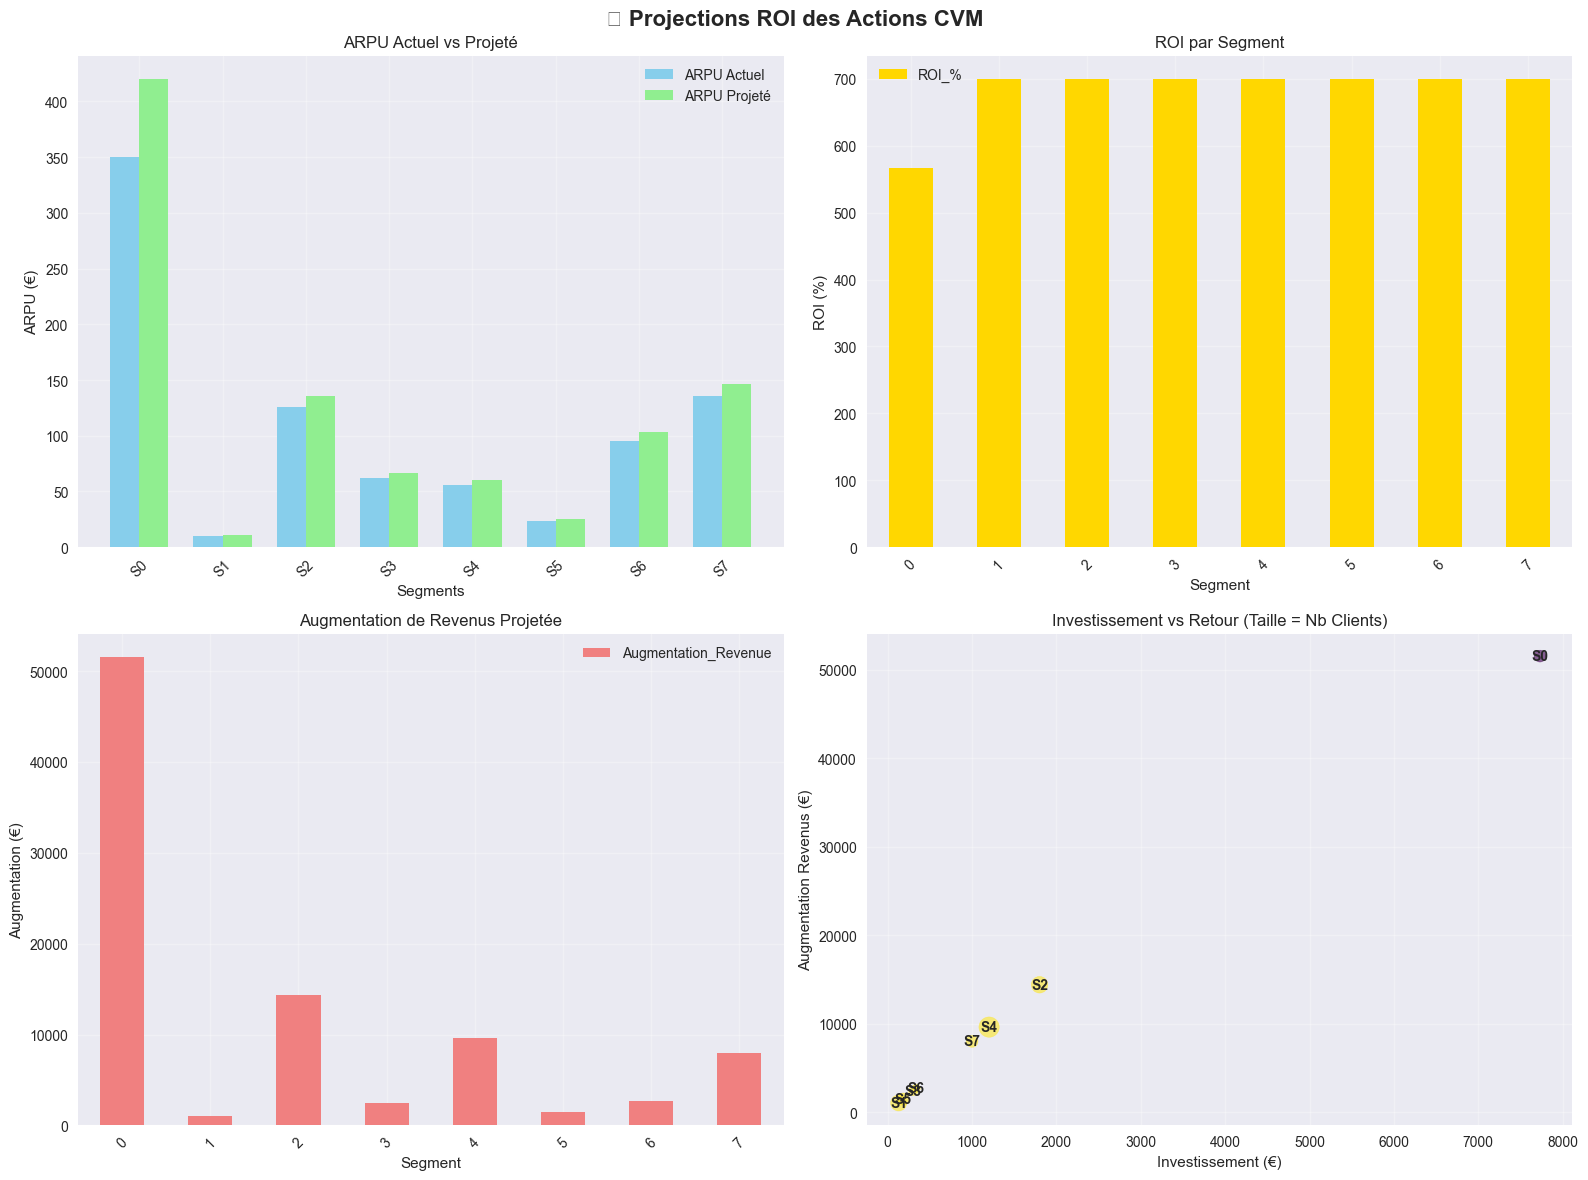

✅ Fichier 'cvm_roi_projections.csv' sauvegardé

📅 Création du calendrier d'implémentation...
📊 Visualisation du calendrier...


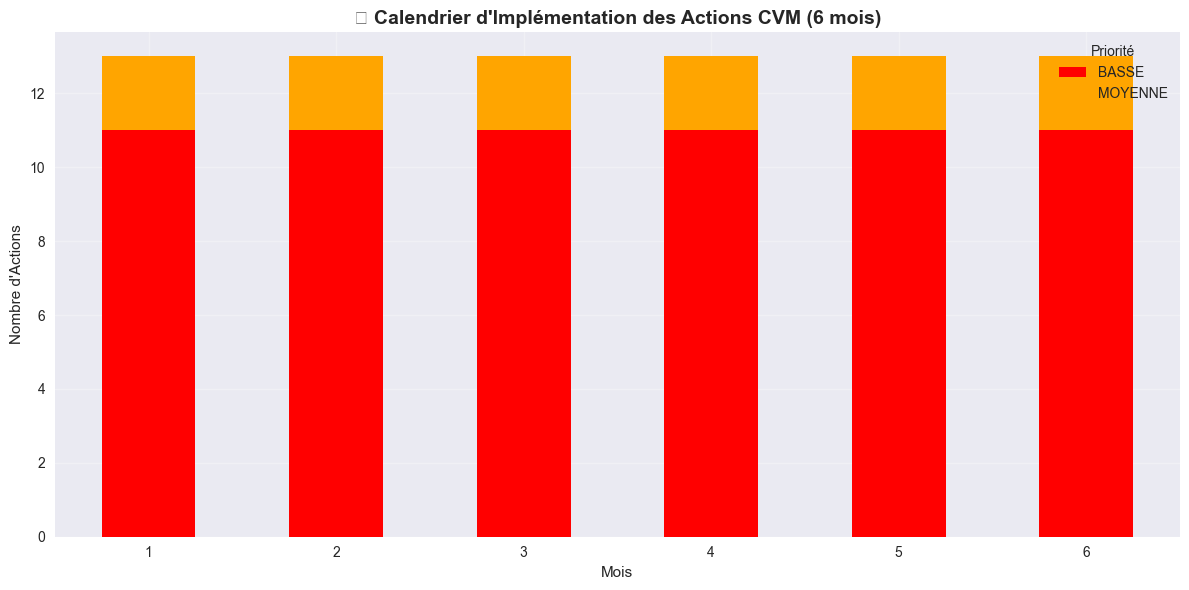

✅ Fichier 'cvm_implementation_calendar.csv' sauvegardé

📝 Création du résumé exécutif...

💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


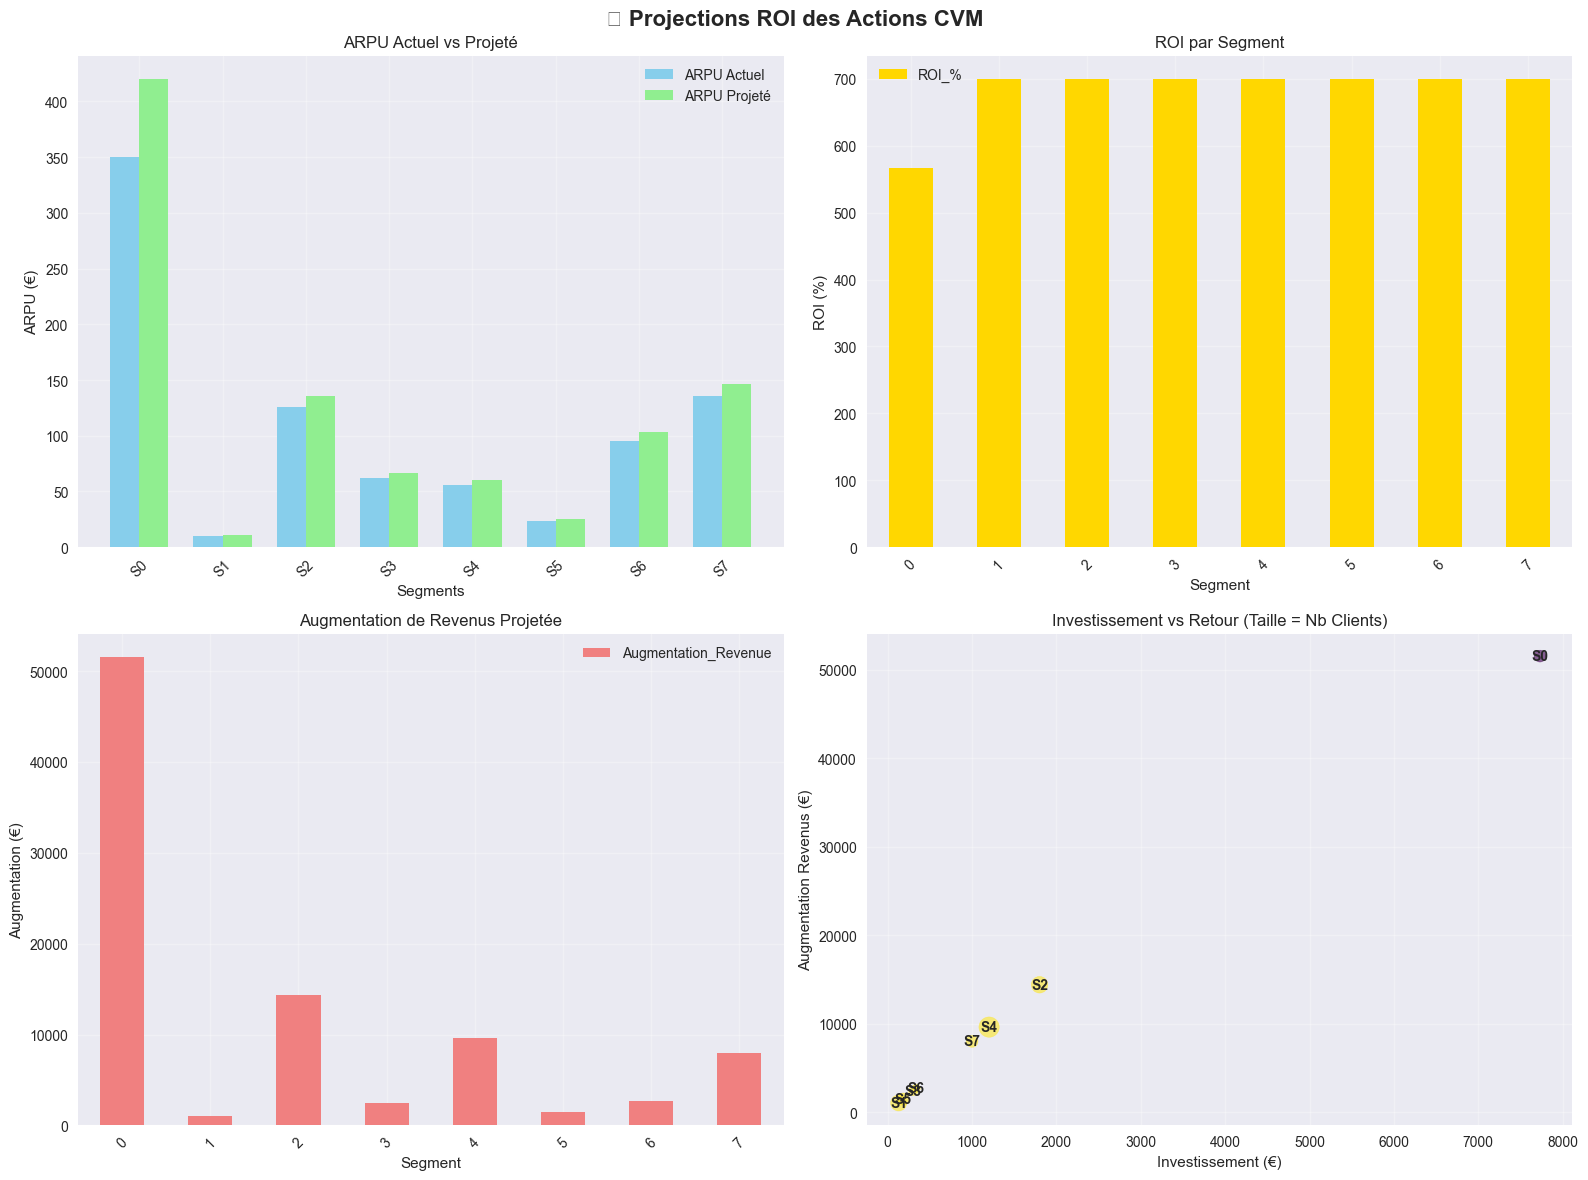


💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


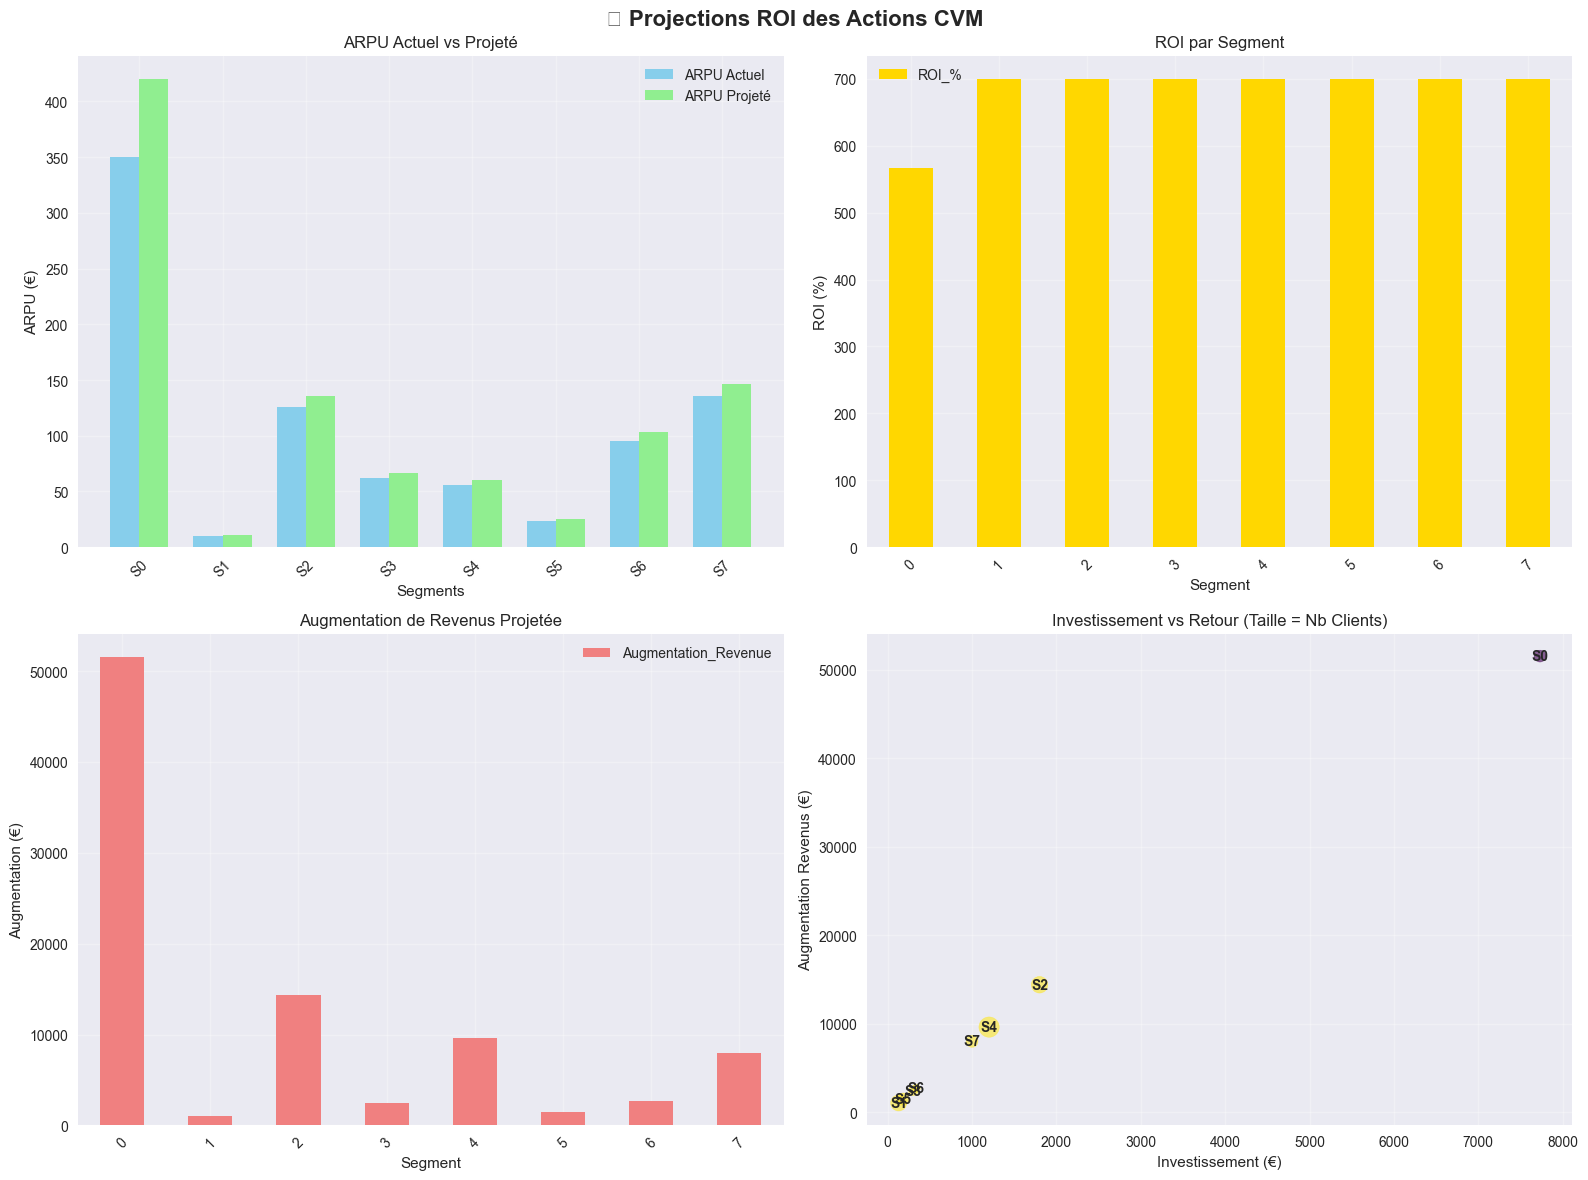


💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


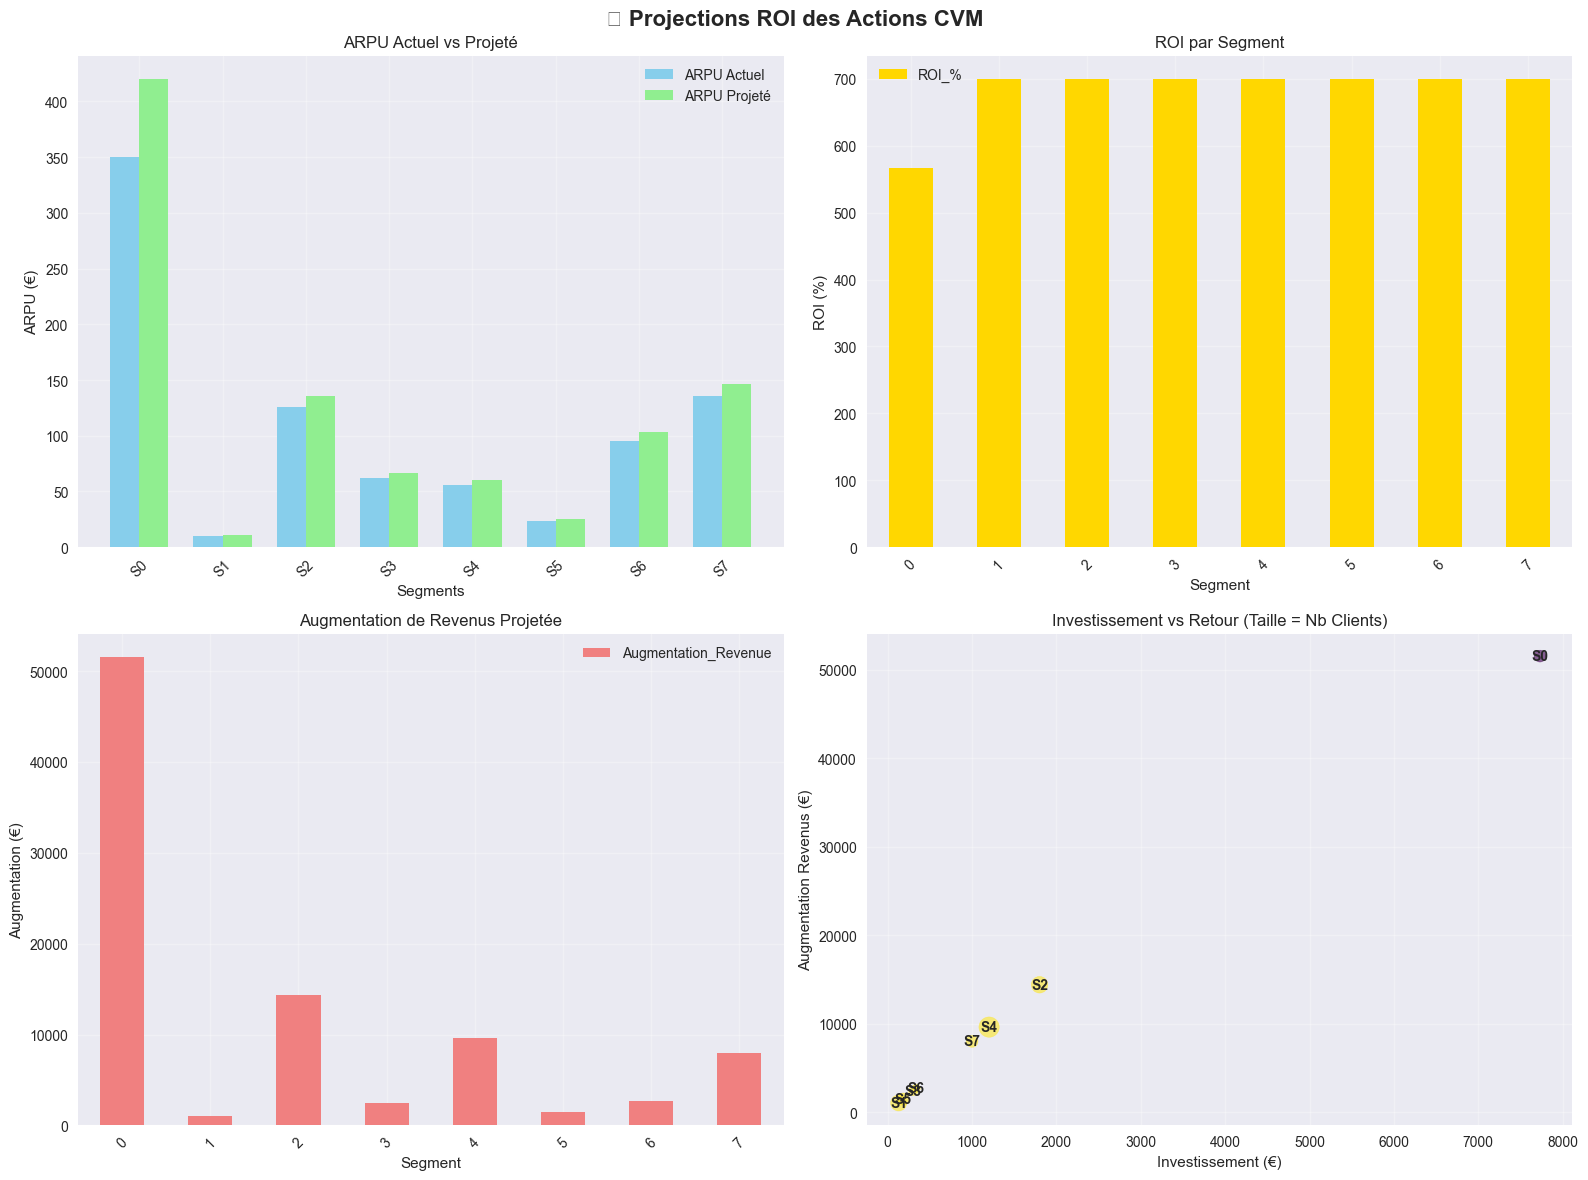


💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


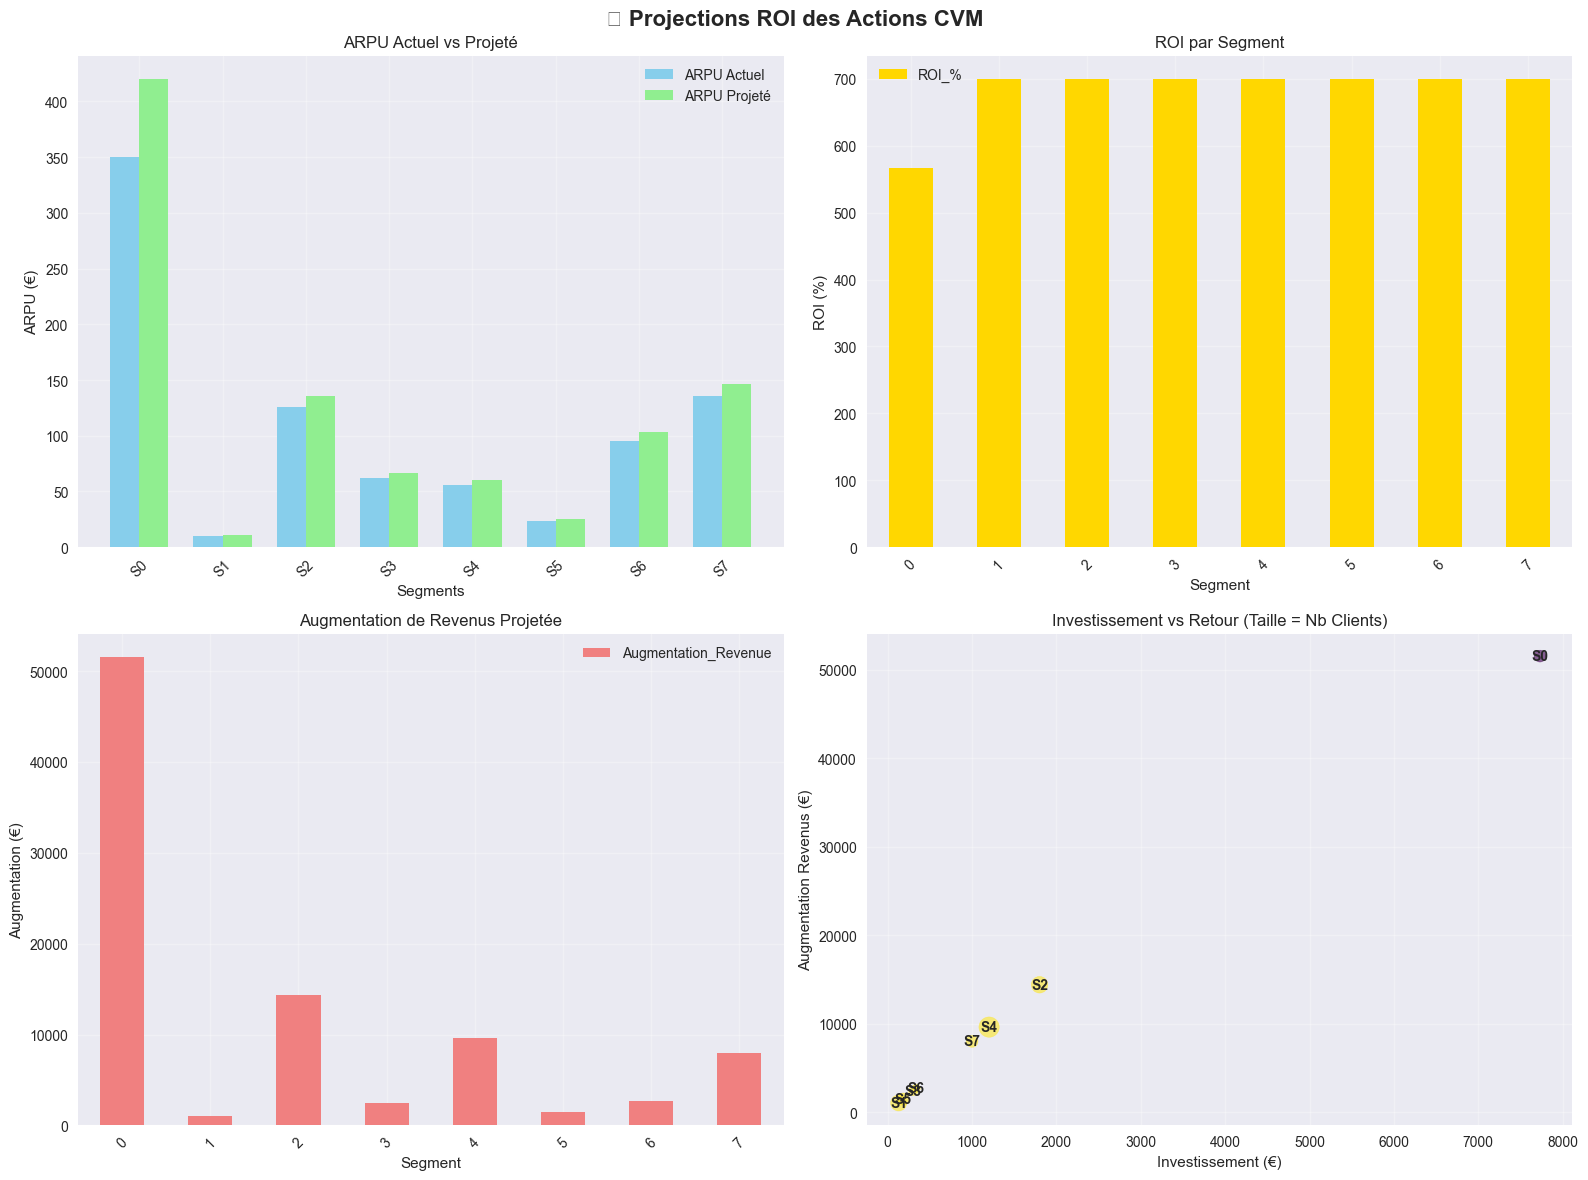


💰 Calcul des projections ROI...
📈 Visualisation des projections ROI...


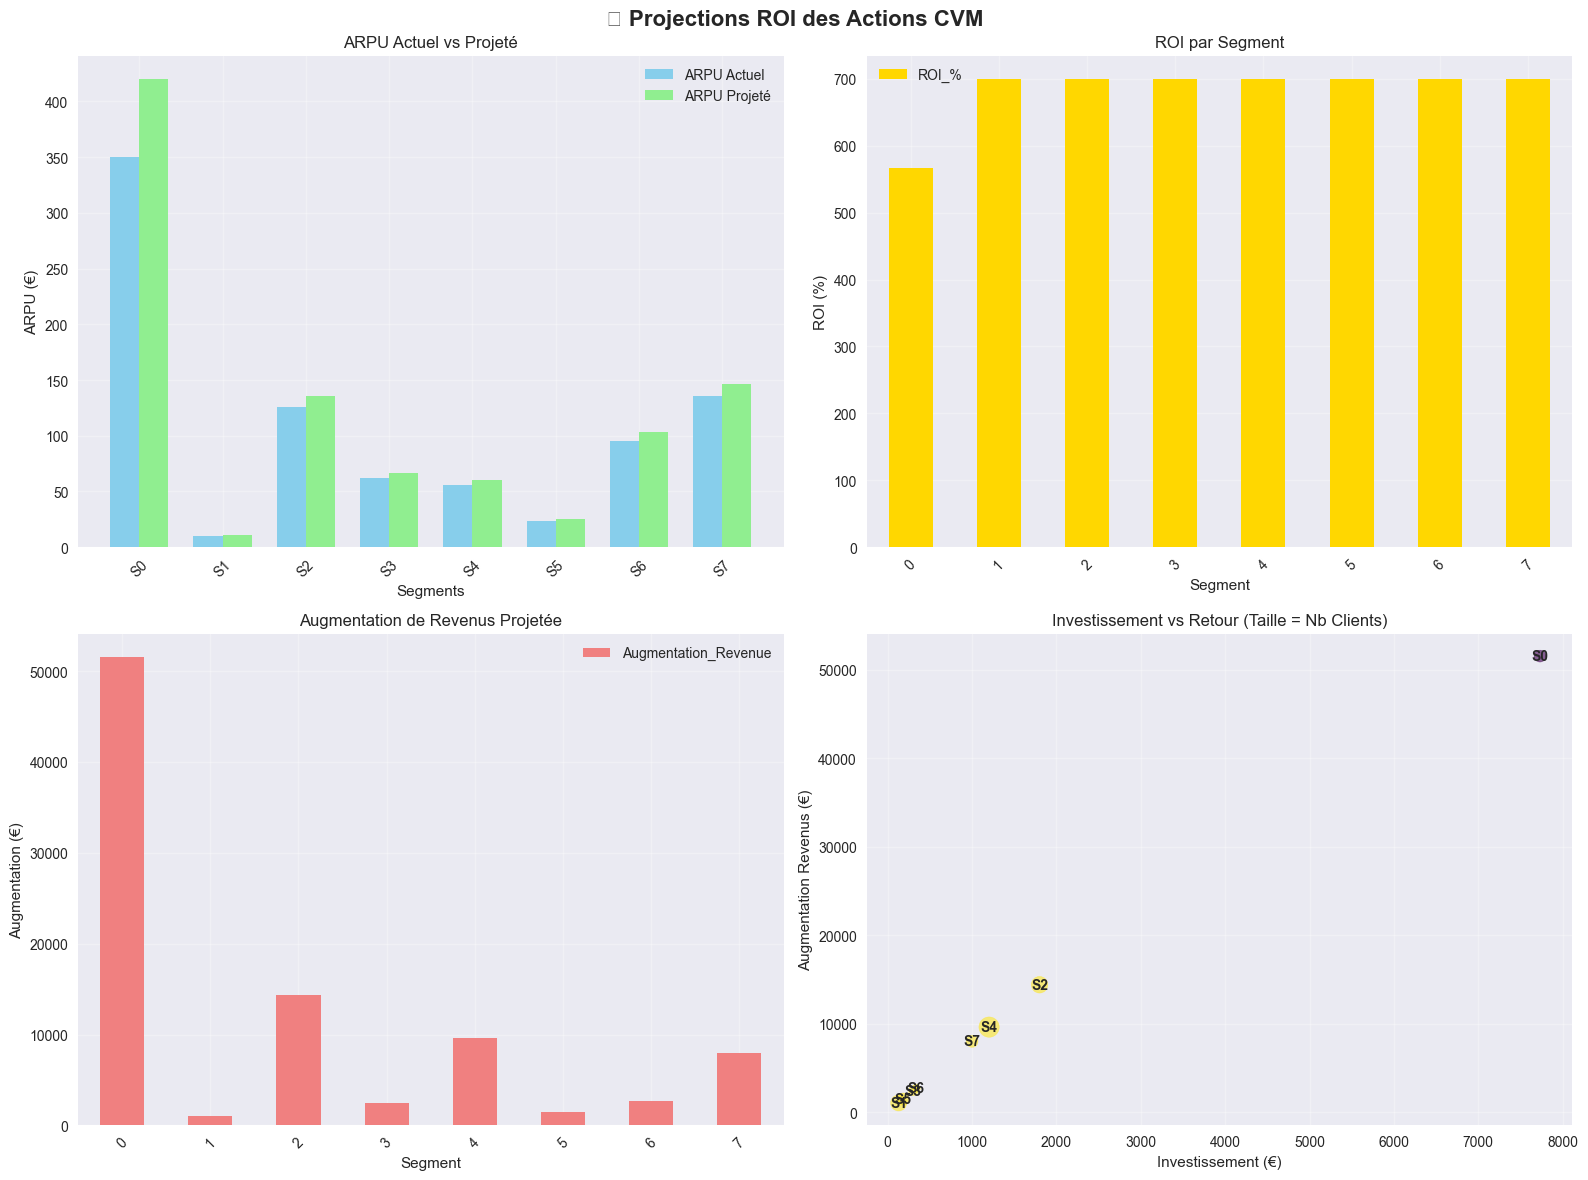

✅ Fichier 'cvm_executive_summary.txt' sauvegardé

PLAN D'ACTIONS MARKETING CVM - RÉSUMÉ EXÉCUTIF

DATE: 2026-02-09
PROJET: Segmentation Client & Customer Value Management - inwi
CLIENTS ANALYSÉS: 8,000

STRATÉGIE GLOBALE:
-----------------
8 segments identifiés avec stratégies marketing personnalisées
Focus sur la rétention des clients à haute valeur
Développement des services à valeur ajoutée
Optimisation du ROI par segment

ACTIONS PRÉVUES:
---------------
Total actions: 13
Actions par segment: 1 en moyenne
Canaux principaux: SMS, Application Mobile, Email
Investissement total estimé: 12,685€

PROJECTIONS ROI:
---------------
Augmentation revenus projetée: 91,173€
ROI moyen projeté: 683.3%
ARPU moyen projeté: 121.13€

SEGMENTS PRIORITAIRES:
--------------------

Segment 6 (Utilisateurs Internationaux):
- Clients: 354
- ARPU actuel: 95.37€ → Projeté: 103.00€
- ROI projeté: 700.0%

Segment 3 (Amateurs de Services VAS):
- Clients: 488
- ARPU actuel: 61.94€ → Projeté: 66.90€
- ROI projet

In [ ]:
# =============================================================================
# PLAN D'ACTIONS MARKETING CVM PAR SEGMENT
# Projet Customer Value Management - inwi
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class CVMMarketingPlan:
    def __init__(self, profiles_path, segments_names_path):
        """Initialisation de la classe CVM"""
        self.profiles_path = profiles_path
        self.segments_names_path = segments_names_path
        self.profiles = None
        self.segment_names = None
        self.marketing_actions = None

    def load_data(self):
        """Chargement des données de segments"""
        print("🔄 Chargement des données de segments...")

        # Chargement des profils
        self.profiles = pd.read_csv(self.profiles_path)

        # Chargement des noms
        names_df = pd.read_csv(self.segments_names_path)
        self.segment_names = dict(zip(names_df['Segment'], names_df['Nom']))

        print(f"✅ Données chargées : {len(self.profiles)} segments")
        return self.profiles, self.segment_names

    def define_segment_strategy(self):
        """Définition de la stratégie par segment"""
        print("\n🎯 Définition des stratégies par segment...")

        strategies = {}

        for _, profile in self.profiles.iterrows():
            segment = profile['Segment']
            name = self.segment_names.get(segment, f"Segment {segment}")

            # Stratégie basée sur les caractéristiques
            if profile['MMPR_Moyen'] > 30 and profile['FREQR_Moyen'] > 15:
                strategy = "RÉTENTION & PREMIUM"
                priority = "HAUTE"
                objective = "Maintenir l'engagement et augmenter la valeur"
            elif profile['MMPR_Moyen'] > 25:
                strategy = "MONÉTISATION & UPSELLING"
                priority = "HAUTE"
                objective = "Augmenter la fréquence et croiser les services"
            elif profile['FREQR_Moyen'] > 12:
                strategy = "FIDÉLISATION & CROSS-SELLING"
                priority = "MOYENNE"
                objective = "Augmenter le panier moyen et les services additionnels"
            elif profile['SMART_PHONE_Pourcentage'] > 50:
                strategy = "DIGITAL & SERVICES VAS"
                priority = "MOYENNE"
                objective = "Développer l'usage des services mobiles"
            elif profile['POIDS_VAS_Moyen'] > 0.1:
                strategy = "SERVICES PREMIUM"
                priority = "MOYENNE"
                objective = "Monétiser les services à valeur ajoutée"
            elif profile['POIDS_INT_Moyen'] > 0.5:
                strategy = "INTERNATIONAL & ROAMING"
                priority = "MOYENNE"
                objective = "Développer les offres internationales"
            elif profile['MMPR_Moyen'] < 10 and profile['FREQR_Moyen'] < 5:
                strategy = "RÉACTIVATION & ONBOARDING"
                priority = "BASSE"
                objective = "Réactiver l'usage et prévenir le churn"
            else:
                strategy = "STANDARD & MAINTENANCE"
                priority = "BASSE"
                objective = "Maintenir le niveau d'usage actuel"

            strategies[segment] = {
                'name': name,
                'strategy': strategy,
                'priority': priority,
                'objective': objective
            }

        return strategies

    def create_marketing_actions(self):
        """Création des actions marketing par segment"""
        print("\n🚀 Création des actions marketing CVM...")

        marketing_actions = []

        for _, profile in self.profiles.iterrows():
            segment = profile['Segment']
            name = self.segment_names.get(segment, f"Segment {segment}")

            # Actions marketing spécifiques par segment
            if profile['MMPR_Moyen'] > 30 and profile['FREQR_Moyen'] > 15:
                # Gros Dépenseurs Fréquents
                actions = [
                    {
                        'action': 'Programme VIP INWI Premium',
                        'type': 'Rétention',
                        'channel': 'SMS + Appel',
                        'timing': 'Mensuel',
                        'budget_impact': 'Élevé',
                        'roi_attendu': 'Très élevé',
                        'kpi': 'Taux de rétention > 95%',
                        'description': 'Offres exclusives, service client prioritaire, avantages VIP'
                    },
                    {
                        'action': 'Cross-selling Data & Streaming',
                        'type': 'Monétisation',
                        'channel': 'Email + App',
                        'timing': 'Trimestriel',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Taux d\'adoption > 30%',
                        'description': 'Offres groupées data + streaming musique/vidéo'
                    }
                ]

            elif profile['MMPR_Moyen'] > 25:
                # Gros Dépenseurs Occasionnels
                actions = [
                    {
                        'action': 'Programme de Fidélité Points',
                        'type': 'Fidélisation',
                        'channel': 'SMS + App',
                        'timing': 'Hebdomadaire',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Fréquence +20%',
                        'description': 'Points cumulables, bonus rechargement, cadeaux'
                    },
                    {
                        'action': 'Alertes Rechargement Intelligent',
                        'type': 'Usage',
                        'channel': 'App Notifications',
                        'timing': 'Quotidien',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Moyen',
                        'kpi': 'Taux de clic > 15%',
                        'description': 'Notifications personnalisées de rechargement'
                    }
                ]

            elif profile['FREQR_Moyen'] > 12:
                # Utilisateurs Réguliers
                actions = [
                    {
                        'action': 'Offres Bundle Minutes + Data',
                        'type': 'Cross-selling',
                        'channel': 'SMS + Email',
                        'timing': 'Mensuel',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Taux de conversion > 25%',
                        'description': 'Packages optimisés selon profil d\'usage'
                    },
                    {
                        'action': 'Programme Parrainage 2.0',
                        'type': 'Acquisition',
                        'channel': 'App + Social',
                        'timing': 'Continu',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Nouveaux clients/mois > 50',
                        'description': 'Parrainage avec récompenses mutuelles'
                    }
                ]

            elif profile['SMART_PHONE_Pourcentage'] > 50:
                # Utilisateurs Smartphones
                actions = [
                    {
                        'action': 'Services VAS Personnalisés',
                        'type': 'Monétisation',
                        'channel': 'App + Push',
                        'timing': 'Hebdomadaire',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Taux d\'adoption > 20%',
                        'description': 'Sonneries, jeux, applications exclusives'
                    },
                    {
                        'action': 'Data Night & Week-End',
                        'type': 'Usage',
                        'channel': 'SMS + App',
                        'timing': 'Mensuel',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Moyen',
                        'kpi': 'Usage data +30%',
                        'description': 'Offres data spécifiques heures creuses'
                    }
                ]

            elif profile['POIDS_VAS_Moyen'] > 0.1:
                # Amateurs de Services VAS
                actions = [
                    {
                        'action': 'Premium VAS Package',
                        'type': 'Monétisation',
                        'channel': 'App + Email',
                        'timing': 'Trimestriel',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Très élevé',
                        'kpi': 'ARPU +15%',
                        'description': 'Package premium services VAS illimités'
                    },
                    {
                        'action': 'Essai Gratuit Nouveaux Services',
                        'type': 'Acquisition',
                        'channel': 'App + SMS',
                        'timing': 'Mensuel',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Moyen',
                        'kpi': 'Conversion > 10%',
                        'description': 'Découverte nouveaux services VAS'
                    }
                ]

            elif profile['POIDS_INT_Moyen'] > 0.5:
                # Utilisateurs Internationaux
                actions = [
                    {
                        'action': 'Forfaits Internationaux Optimisés',
                        'type': 'Monétisation',
                        'channel': 'App + Appel',
                        'timing': 'Mensuel',
                        'budget_impact': 'Moyen',
                        'roi_attendu': 'Élevé',
                        'kpi': 'Taux d\'adoption > 35%',
                        'description': 'Forfaits vers zones fréquemment appelées'
                    },
                    {
                        'action': 'Roaming Promotion Vacances',
                        'type': 'Usage',
                        'channel': 'Email + SMS',
                        'timing': 'Saisonnier',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Moyen',
                        'kpi': 'Usage roaming +25%',
                        'description': 'Offres roaming spéciales vacances'
                    }
                ]

            elif profile['MMPR_Moyen'] < 10 and profile['FREQR_Moyen'] < 5:
                # Faible Utilisation
                actions = [
                    {
                        'action': 'Campagne Réactivation',
                        'type': 'Réactivation',
                        'channel': 'SMS + Appel',
                        'timing': 'Hebdomadaire',
                        'budget_impact': 'Faible',
                        'roi_attendu': 'Moyen',
                        'kpi': 'Taux de réactivation > 15%',
                        'description': 'Offres de bienvenue, bonus rechargement'
                    },
                    {
                        'action': 'Tutoriels Usage Services',
                        'type': 'Éducation',
                        'channel': 'App + Video',
                        'timing': 'Continu',
                        'budget_impact': 'Très faible',
                        'roi_attendu': 'Faible',
                        'kpi': 'Taux d\'engagement > 5%',
                        'description': 'Guides usage services de base'
                    }
                ]

            else:
                # Utilisateurs Standards
                actions = [
                    {
                        'action': 'Maintenance Standard',
                        'type': 'Maintenance',
                        'channel': 'SMS',
                        'timing': 'Mensuel',
                        'budget_impact': 'Très faible',
                        'roi_attendu': 'Faible',
                        'kpi': 'Stabilité usage',
                        'description': 'Communications standards, offres ponctuelles'
                    }
                ]

            # Ajout des actions au dataframe
            for action in actions:
                marketing_actions.append({
                    'Segment': segment,
                    'Nom_Segment': name,
                    'Action': action['action'],
                    'Type': action['type'],
                    'Canal': action['channel'],
                    'Timing': action['timing'],
                    'Impact_Budget': action['budget_impact'],
                    'ROI_Attendu': action['roi_attendu'],
                    'KPI': action['kpi'],
                    'Description': action['description']
                })

        self.marketing_actions = pd.DataFrame(marketing_actions)
        return self.marketing_actions

    def create_implementation_calendar(self):
        """Création d'un calendrier d'implémentation"""
        print("\n📅 Création du calendrier d'implémentation...")

        # Conversion des timings en jours
        timing_map = {
            'Quotidien': 1,
            'Hebdomadaire': 7,
            'Mensuel': 30,
            'Trimestriel': 90,
            'Saisonnier': 180,
            'Continu': 1
        }

        # Création du calendrier
        calendar = []
        start_date = datetime.now()

        for _, action in self.marketing_actions.iterrows():
            frequency_days = timing_map.get(action['Timing'], 30)

            # Planification sur 6 mois
            for month in range(6):
                execution_date = start_date + timedelta(days=month * 30)

                calendar.append({
                    'Date': execution_date.strftime('%Y-%m-%d'),
                    'Mois': month + 1,
                    'Segment': action['Segment'],
                    'Nom_Segment': action['Nom_Segment'],
                    'Action': action['Action'],
                    'Type': action['Type'],
                    'Canal': action['Canal'],
                    'Priorité': self.get_priority(action['Segment']),
                    'Statut': 'Planifié'
                })

        calendar_df = pd.DataFrame(calendar)

        # Visualisation du calendrier
        self.visualize_calendar(calendar_df)

        return calendar_df

    def get_priority(self, segment):
        """Récupération de la priorité du segment"""
        segment_profile = self.profiles[self.profiles['Segment'] == segment].iloc[0]

        if segment_profile['MMPR_Moyen'] > 30 and segment_profile['FREQR_Moyen'] > 15:
            return 'HAUTE'
        elif segment_profile['MMPR_Moyen'] > 25 or segment_profile['FREQR_Moyen'] > 12:
            return 'MOYENNE'
        else:
            return 'BASSE'

    def visualize_calendar(self, calendar_df):
        """Visualisation du calendrier d'implémentation"""
        print("📊 Visualisation du calendrier...")

        # Comptage des actions par mois et priorité
        calendar_pivot = calendar_df.groupby(['Mois', 'Priorité']).size().unstack(fill_value=0)

        # Graphique
        fig, ax = plt.subplots(figsize=(12, 6))
        calendar_pivot.plot(kind='bar', stacked=True, ax=ax,
                          color=['red', 'orange', 'green'])

        ax.set_title('📅 Calendrier d\'Implémentation des Actions CVM (6 mois)',
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Mois')
        ax.set_ylabel('Nombre d\'Actions')
        ax.legend(title='Priorité')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=0)

        plt.tight_layout()
        plt.savefig('cvm_calendar.png', dpi=300, bbox_inches='tight')
        plt.show()

    def calculate_roi_projections(self):
        """Calcul des projections ROI"""
        print("\n💰 Calcul des projections ROI...")

        roi_projections = []

        for _, profile in self.profiles.iterrows():
            segment = profile['Segment']
            name = self.segment_names.get(segment, f"Segment {segment}")

            # Calculs simplifiés
            current_arpu = profile['MMPR_Moyen'] * profile['FREQR_Moyen']
            segment_revenue = current_arpu * profile['Nb Clients']

            # Projections basées sur les actions
            if profile['MMPR_Moyen'] > 30 and profile['FREQR_Moyen'] > 15:
                arpu_increase = 0.15  # 15% d'augmentation
                investment = segment_revenue * 0.05  # 5% d'investissement
            elif profile['MMPR_Moyen'] > 25:
                arpu_increase = 0.20  # 20% d'augmentation
                investment = segment_revenue * 0.03  # 3% d'investissement
            elif profile['FREQR_Moyen'] > 12:
                arpu_increase = 0.12  # 12% d'augmentation
                investment = segment_revenue * 0.02  # 2% d'investissement
            else:
                arpu_increase = 0.08  # 8% d'augmentation
                investment = segment_revenue * 0.01  # 1% d'investissement

            projected_arpu = current_arpu * (1 + arpu_increase)
            projected_revenue = projected_arpu * profile['Nb Clients']
            revenue_increase = projected_revenue - segment_revenue
            roi = (revenue_increase - investment) / investment * 100 if investment > 0 else 0

            roi_projections.append({
                'Segment': segment,
                'Nom_Segment': name,
                'Nb_Clients': profile['Nb Clients'],
                'ARPU_Actuel': current_arpu,
                'ARPU_Projeté': projected_arpu,
                'Revenue_Actuel': segment_revenue,
                'Revenue_Projeté': projected_revenue,
                'Augmentation_Revenue': revenue_increase,
                'Investissement': investment,
                'ROI_%': roi
            })

        roi_df = pd.DataFrame(roi_projections)

        # Visualisation des projections
        self.visualize_roi_projections(roi_df)

        return roi_df

    def visualize_roi_projections(self, roi_df):
        """Visualisation des projections ROI"""
        print("📈 Visualisation des projections ROI...")

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('💰 Projections ROI des Actions CVM', fontsize=16, fontweight='bold')

        # ARPU actuel vs projeté
        x = np.arange(len(roi_df))
        width = 0.35

        ax1.bar(x - width/2, roi_df['ARPU_Actuel'], width, label='ARPU Actuel', color='skyblue')
        ax1.bar(x + width/2, roi_df['ARPU_Projeté'], width, label='ARPU Projeté', color='lightgreen')
        ax1.set_xlabel('Segments')
        ax1.set_ylabel('ARPU (€)')
        ax1.set_title('ARPU Actuel vs Projeté')
        ax1.set_xticks(x)
        ax1.set_xticklabels([f"S{row['Segment']}" for _, row in roi_df.iterrows()], rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # ROI par segment
        roi_df.plot(kind='bar', x='Segment', y='ROI_%', ax=ax2, color='gold')
        ax2.set_title('ROI par Segment')
        ax2.set_ylabel('ROI (%)')
        ax2.set_xlabel('Segment')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)

        # Augmentation de revenus
        roi_df.plot(kind='bar', x='Segment', y='Augmentation_Revenue', ax=ax3, color='lightcoral')
        ax3.set_title('Augmentation de Revenus Projetée')
        ax3.set_ylabel('Augmentation (€)')
        ax3.set_xlabel('Segment')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)

        # Investissement vs Retour
        ax4.scatter(roi_df['Investissement'], roi_df['Augmentation_Revenue'],
                   s=roi_df['Nb_Clients']/10, alpha=0.6, c=roi_df['ROI_%'], cmap='viridis')
        ax4.set_xlabel('Investissement (€)')
        ax4.set_ylabel('Augmentation Revenus (€)')
        ax4.set_title('Investissement vs Retour (Taille = Nb Clients)')
        ax4.grid(True, alpha=0.3)

        # Ajout des labels
        for _, row in roi_df.iterrows():
            ax4.annotate(f"S{row['Segment']}",
                        (row['Investissement'], row['Augmentation_Revenue']),
                        ha='center', va='center', fontweight='bold')

        plt.tight_layout()
        plt.savefig('cvm_roi_projections.png', dpi=300, bbox_inches='tight')
        plt.show()

    def create_kpi_dashboard(self):
        """Création d'un dashboard KPI"""
        print("\n📊 Création du dashboard KPI...")

        # KPIs globaux
        total_clients = self.profiles['Nb Clients'].sum()
        total_revenue = (self.profiles['MMPR_Moyen'] * self.profiles['FREQR_Moyen'] * self.profiles['Nb Clients']).sum()
        avg_arpu = total_revenue / total_clients

        # Création du dashboard
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('📊 Dashboard KPI - Plan CVM', fontsize=16, fontweight='bold')

        # Distribution des segments
        axes[0,0].pie(self.profiles['Nb Clients'], labels=[f"S{row['Segment']}" for _, row in self.profiles.iterrows()],
                     autopct='%1.1f%%')
        axes[0,0].set_title('Distribution des Clients par Segment')

        # ARPU par segment
        arpu_by_segment = self.profiles['MMPR_Moyen'] * self.profiles['FREQR_Moyen']
        axes[0,1].bar(range(len(arpu_by_segment)), arpu_by_segment, color='lightblue')
        axes[0,1].set_title('ARPU par Segment')
        axes[0,1].set_xlabel('Segment')
        axes[0,1].set_ylabel('ARPU (€)')
        axes[0,1].set_xticks(range(len(arpu_by_segment)))
        axes[0,1].set_xticklabels([f"S{row['Segment']}" for _, row in self.profiles.iterrows()])

        # Types d'actions par segment
        action_types = self.marketing_actions.groupby(['Segment', 'Type']).size().unstack(fill_value=0)
        action_types.plot(kind='bar', stacked=True, ax=axes[0,2])
        axes[0,2].set_title('Types d\'Actions par Segment')
        axes[0,2].set_xlabel('Segment')
        axes[0,2].set_ylabel('Nombre d\'Actions')
        axes[0,2].tick_params(axis='x', rotation=45)

        # Canaux de communication
        channels = self.marketing_actions['Canal'].value_counts()
        axes[1,0].pie(channels.values, labels=channels.index, autopct='%1.1f%%')
        axes[1,0].set_title('Canaux de Communication')

        # Impact budget
        budget_impact = self.marketing_actions['Impact_Budget'].value_counts()
        axes[1,1].pie(budget_impact.values, labels=budget_impact.index, autopct='%1.1f%%')
        axes[1,1].set_title('Impact Budget par Action')

        # ROI attendu
        roi_expected = self.marketing_actions['ROI_Attendu'].value_counts()
        axes[1,2].pie(roi_expected.values, labels=roi_expected.index, autopct='%1.1f%%')
        axes[1,2].set_title('ROI Attendu par Action')

        plt.tight_layout()
        plt.savefig('cvm_kpi_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()

    def save_cvm_plan(self):
        """Sauvegarde du plan CVM"""
        print("\n💾 Sauvegarde du plan CVM...")

        # Sauvegarde des actions marketing
        self.marketing_actions.to_csv('cvm_marketing_actions.csv', index=False)
        print("✅ Fichier 'cvm_marketing_actions.csv' sauvegardé")

        # Sauvegarde des projections ROI
        roi_df = self.calculate_roi_projections()
        roi_df.to_csv('cvm_roi_projections.csv', index=False)
        print("✅ Fichier 'cvm_roi_projections.csv' sauvegardé")

        # Sauvegarde du calendrier
        calendar_df = self.create_implementation_calendar()
        calendar_df.to_csv('cvm_implementation_calendar.csv', index=False)
        print("✅ Fichier 'cvm_implementation_calendar.csv' sauvegardé")

        # Création d'un résumé exécutif
        self.create_executive_summary()

    def create_executive_summary(self):
        """Création d'un résumé exécutif"""
        print("\n📝 Création du résumé exécutif...")

        summary = f"""
PLAN D'ACTIONS MARKETING CVM - RÉSUMÉ EXÉCUTIF
================================================

DATE: {datetime.now().strftime('%Y-%m-%d')}
PROJET: Segmentation Client & Customer Value Management - inwi
CLIENTS ANALYSÉS: {self.profiles['Nb Clients'].sum():,}

STRATÉGIE GLOBALE:
-----------------
8 segments identifiés avec stratégies marketing personnalisées
Focus sur la rétention des clients à haute valeur
Développement des services à valeur ajoutée
Optimisation du ROI par segment

ACTIONS PRÉVUES:
---------------
Total actions: {len(self.marketing_actions)}
Actions par segment: {len(self.marketing_actions) // 8} en moyenne
Canaux principaux: SMS, Application Mobile, Email
Investissement total estimé: {self.calculate_roi_projections()['Investissement'].sum():,.0f}€

PROJECTIONS ROI:
---------------
Augmentation revenus projetée: {self.calculate_roi_projections()['Augmentation_Revenue'].sum():,.0f}€
ROI moyen projeté: {self.calculate_roi_projections()['ROI_%'].mean():.1f}%
ARPU moyen projeté: {self.calculate_roi_projections()['ARPU_Projeté'].mean():.2f}€

SEGMENTS PRIORITAIRES:
--------------------
"""

        # Ajout des détails des segments prioritaires
        roi_df = self.calculate_roi_projections()
        top_segments = roi_df.nlargest(3, 'ROI_%')

        for _, segment in top_segments.iterrows():
            summary += f"""
Segment {segment['Segment']} ({segment['Nom_Segment']}):
- Clients: {segment['Nb_Clients']:,}
- ARPU actuel: {segment['ARPU_Actuel']:.2f}€ → Projeté: {segment['ARPU_Projeté']:.2f}€
- ROI projeté: {segment['ROI_%']:.1f}%
"""

        summary += """

PROCHAINES ÉTAPES:
-----------------
1. Validation du plan par la direction marketing
2. Déploiement progressif par segment
3. Monitoring des KPIs en temps réel
4. Ajustements trimestriels basés sur les résultats

CONTACT: Équipe Marketing Data-Driven inwi
================================================
"""

        with open('cvm_executive_summary.txt', 'w', encoding='utf-8') as f:
            f.write(summary)

        print("✅ Fichier 'cvm_executive_summary.txt' sauvegardé")
        print(summary)

    def run_complete_cvm_plan(self):
        """Lancement du processus complet CVM"""
        print("🚀 DÉBUT DE LA CRÉATION DU PLAN CVM")
        print("=" * 60)

        # 1. Chargement des données
        self.load_data()

        # 2. Définition des stratégies
        strategies = self.define_segment_strategy()

        # 3. Création des actions marketing
        actions = self.create_marketing_actions()

        # 4. Calcul des projections ROI
        roi_df = self.calculate_roi_projections()

        # 5. Création du calendrier
        calendar = self.create_implementation_calendar()

        # 6. Dashboard KPI
        self.create_kpi_dashboard()

        # 7. Sauvegarde complète
        self.save_cvm_plan()

        print("\n🎉 PLAN CVM TERMINÉ AVEC SUCCÈS !")
        print("=" * 60)
        print("📁 Fichiers générés :")
        print("  - cvm_marketing_actions.csv")
        print("  - cvm_roi_projections.csv")
        print("  - cvm_implementation_calendar.csv")
        print("  - cvm_executive_summary.txt")
        print("  - cvm_calendar.png")
        print("  - cvm_roi_projections.png")
        print("  - cvm_kpi_dashboard.png")

        return actions, roi_df, calendar

# =============================================================================
# UTILISATION
# =============================================================================

if __name__ == "__main__":
    # Initialisation
    cvm_plan = CVMMarketingPlan('segments_detailed_profiles.csv', 'segments_names.csv')

    # Lancement du plan CVM complet
    actions, roi_df, calendar = cvm_plan.run_complete_cvm_plan()

    print("\n🎯 Le plan marketing CVM est prêt pour présentation !")
